In [1]:
import gym
import torch
import gym_nav
import numpy as np

import sys
sys.path.append('../')
from evaluation import *
from model_evaluation import *
from trajectories import *
from shortcut_analysis import *
from explore_analysis import *
from plotting_utils import *

from tqdm import tqdm
from umap import UMAP

pplt.rc.reset()

# Data Loading

Saved data blocks used for plots in this notebook. Note we will also load the relevant data in each plotting block, but these are here for quick reference

**4 Wall colors**

In [5]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))

all_chks = {
    32: [80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920],
    64: [40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460],
}
batch_sizes = [32, 64]
probs = [0.1, 0.2, 0.4]

# For individual activations, run for example
# shortcut_res = pickle.load(open('data/shortcut/wc4_copied/64_0.4_0', 'rb'))

**4 Wall colors longer training**

In [6]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied_longer/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4longer_userates', 'rb'))

all_chks = {
    32: np.arange(80, 4680, 80),
    64: np.arange(40, 2340, 40),
}
batch_sizes = [32, 64]
probs = [0.1, 0.4]

# For individual activations, run for example
# shortcut_res = pickle.load(open('data/shortcut/wc4_copied_longer/64_0.4_0', 'rb'))

**White wall color**

In [9]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))

chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]

# For individual activations, run for example
# shortcut_res = pickle.load(open('data/shortcut/wc1.5_copied/0.4_0', 'rb'))

# Data Collection

All various types of data collection - note some are incomplete (in terms of having 4 wall colors/4 wall colors longer/white wall color) since we did not end up using every type of data in analysis

## Activations

### Forced trajectories

Collecting activations along forced trajectories

**4 Wall colors**

In [2]:
fa = pickle.load(open('data/shortcut/forced_actions', 'rb'))
forced_actions = fa['forced_actions']
seed = fa['seed']
savedir = 'data/shortcut/wc4_copied'

all_chks = {
    32: [80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920],
    64: [40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460],
}
batch_sizes = [32, 64]
probs = [0.1, 0.2, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            if key in os.listdir(savedir):
                continue
                
            chks = all_chks[batch]
            shortcut_res = test_shortcut_activations_chks(prob=prob, batch=batch, skip_activs=False, 
                                                        trial=trial, chks=chks, umap_min_dist=0.75,
                                                        forced_actions=forced_actions, seed=seed)
            pickle.dump(shortcut_res, open(f'{savedir}/{key}', 'wb'))


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [05:43<00:00, 15.63s/it]


**4 Wall colors longer training**

In [4]:
fa = pickle.load(open('data/shortcut/forced_actions', 'rb'))
forced_actions = fa['forced_actions']
seed = fa['seed']
savedir = 'data/shortcut/wc4_copied_longer'

all_chks = {
    32: np.arange(80, 4680, 80),
    64: np.arange(40, 2340, 40),
}
batch_sizes = [32, 64]
probs = [0.1, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            if key in os.listdir(savedir):
                continue
                
            chks = all_chks[batch]
            shortcut_res = test_shortcut_activations_chks(exp_string='shortcutnav_fcp{prob}reset{reset}batch{batch}longer',
                                                          prob=prob, batch=batch, skip_activs=False, 
                                                        trial=trial, chks=chks, umap_min_dist=0.75,
                                                        forced_actions=forced_actions, seed=seed)
            pickle.dump(shortcut_res, open(f'{savedir}/{key}', 'wb'))


100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [11:44<00:00, 12.15s/it]


**White wall color**

In [14]:
fa = pickle.load(open('data/shortcut/forced_actions', 'rb'))
forced_actions = fa['forced_actions']
seed = fa['seed']

chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
all_shortcut_res = {}

savedir = 'data/shortcut/wc1.5_copied'

for p in probs:
    for t in range(3):
        key = f'{p}_{t}'
        exp_name = f'shortcut_wc1.5p{p}'
        if key in os.listdir(savedir):
            continue
        
        shortcut_res = test_shortcut_activations_chks(exp_name=exp_name, trial=t,
                                                   subdir='shortcut_wc', chks=chks,
                                                   env_kwargs={'wall_colors': 1.5},
                                                 umap_min_dist=0.75, skip_activs=False, 
                                                 forced_actions=forced_actions, seed=seed)
        pickle.dump(shortcut_res, open(f'{savedir}/{key}', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [09:43<00:00, 26.50s/it]


#### Forced trajectories with shortcut always open (wc4_copied2, wc1.5_copied2)

Also using set 2 of forced trajectories

**4 Wall colors**

In [4]:
fa = pickle.load(open('data/shortcut/forced_actions2', 'rb'))
forced_actions = fa['forced_actions']
seed = fa['seed']
savedir = 'data/shortcut/wc4_copied2'

all_chks = {
    32: [80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920],
    64: [40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460],
}
batch_sizes = [32, 64]
probs = [0.1, 0.2, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            if key in os.listdir(savedir):
                continue
                
            chks = all_chks[batch]
            shortcut_res = test_shortcut_activations_chks(prob=prob, batch=batch, skip_activs=False, 
                                                        trial=trial, chks=chks, test_only=True,
                                                        forced_actions=forced_actions, seed=seed,
                                                        shortcut_probability=1)
            pickle.dump(shortcut_res, open(f'{savedir}/{key}', 'wb'))


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [04:37<00:00, 12.60s/it]


**White wall color**

In [5]:
fa = pickle.load(open('data/shortcut/forced_actions', 'rb'))
forced_actions = fa['forced_actions']
seed = fa['seed']

chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
all_shortcut_res = {}

savedir = 'data/shortcut/wc1.5_copied2'

for p in probs:
    for t in range(3):
        key = f'{p}_{t}'
        exp_name = f'shortcut_wc1.5p{p}'
        if key in os.listdir(savedir):
            continue
        
        shortcut_res = test_shortcut_activations_chks(exp_name=exp_name, trial=t,
                                                   subdir='shortcut_wc', chks=chks,
                                                   env_kwargs={'wall_colors': 1.5},
                                                 skip_activs=False, test_only=True,
                                                 shortcut_probability=1.,
                                                 forced_actions=forced_actions, seed=seed)
        pickle.dump(shortcut_res, open(f'{savedir}/{key}', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [06:57<00:00, 18.98s/it]


### Pure activations

Collecting activations from an agent's own policy

**4 Wall colors**

In [6]:
all_chks = {
    32: [80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920],
    64: [40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460],
}
batch_sizes = [32, 64]
probs = [0.1, 0.2, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            if key in os.listdir('data/shortcut/activations'):
                continue
            chks = all_chks[batch]
            shortcut_res = test_shortcut_activations_chks(prob=prob, batch=batch, skip_activs=False, 
                                                                  trial=trial, chks=chks)
            pickle.dump(shortcut_res, open(f'data/shortcut/activations/{key}', 'wb'))

  0%|                                                                                           | 0/22 [00:00<?, ?it/s]C:\Users\14and\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
  9%|███████▌                                                                           | 2/22 [01:26<14:35, 43.78s/it]C:\Users\14and\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
  0%|                                                                                           | 0/22 [00:00<?, ?it/s]C:\Users\14and\anaconda3\lib\site-packages\umap\spectra

## Pairwise silhouette scores

For predefined position-based clusters, record pairwise silhouette scores between each cluster of 2D activations

**4 Wall colors**

In [427]:
all_silscores = {}
for n, p in enumerate(probs):
    for m, batch in enumerate(batch_sizes):
        for t in range(3):
            chks = all_chks[batch]
            key = f'{batch}_{p}_{t}'

            shortcut_res = pickle.load(open(f'data/shortcut/wc4_copied/{key}', 'rb'))

            silscores = []
            for res in shortcut_res:
                labels, no_cluster = decompose_shortcut_trajectories(res)
                silscore = pairwise_silhouette_score(res['activ2d'], labels)
                silscores.append(silscore)
                
            all_silscores[key] = silscores
            
pickle.dump(all_silscores, open('data/shortcut/wc4_copied/pairwise_silscores', 'wb'))

**4 Wall colors longer training**

In [7]:
all_silscores = {}
batch_sizes = [32, 64]
probs = [0.1, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            shortcut_res = pickle.load(open(f'data/shortcut/wc4_copied_longer/{key}', 'rb'))

            silscores = []
            for res in tqdm(shortcut_res):
                labels, no_cluster = decompose_shortcut_trajectories(res)
                silscore = pairwise_silhouette_score(res['activ2d'], labels)
                silscores.append(silscore)
            all_silscores[key] = silscores

pickle.dump(all_silscores, open('data/shortcut/wc4_copied_longer/pairwise_silscores', 'wb'))
        

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:43<00:00,  1.32it/s]


**White wall color**

In [29]:
all_silscores = {}
for n, p in enumerate(probs):
    for t in range(3):
        key = f'{p}_{t}'
        shortcut_res = pickle.load(open(f'data/shortcut/wc1.5_copied/{key}', 'rb'))
        
        silscores = []
        for res in shortcut_res:
            labels, no_cluster = decompose_shortcut_trajectories(res)
            silscore = pairwise_silhouette_score(res['activ2d'], labels)
            silscores.append(silscore)
        all_silscores[key] = silscores
        
pickle.dump(all_silscores, open('data/shortcut/wc1.5_copied/pairwise_silscores', 'wb'))
        

### Skipping UMAP

**4 Wall colors**

In [68]:
all_silscores = defaultdict(dict)

probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64]
trials = range(3)
layers = ['shared0', 'shared1', 'actor0', 'actor1', 'critic0', 'critic1']

for p, batch, t in tqdm(itertools.product(probs, batch_sizes, trials), total=18):
    key = f'{batch}_{p}_{t}'

    shortcut_res = pickle.load(open(f'data/shortcut/wc4_copied/{key}', 'rb'))

    for layer in layers:
        silscores = []
        l_type = layer[:-1] + '_activations'
        l_num = int(layer[-1])
        
        for res in shortcut_res:
            activ = res['activs'][l_type][l_num]
            labels, no_cluster = decompose_shortcut_trajectories(res)
            silscore = pairwise_silhouette_score(activ, labels)
            silscores.append(silscore)

        all_silscores[layer][key] = silscores
            
    pickle.dump(all_silscores, open('data/shortcut/wc4_copied/pairwise_silscores_noumap', 'wb'))

100%|███████████████████████████████████████████████████████████████████████████████████████| 18/18 [32:59<00:00, 110.00s/it]


**White wall color**

In [69]:
all_silscores = defaultdict(dict)

probs = [0.1, 0.2, 0.4]
trials = range(3)
layers = ['shared0', 'shared1', 'actor0', 'actor1', 'critic0', 'critic1']

for p, t in tqdm(itertools.product(probs, trials), total=9):
    key = f'{p}_{t}'

    shortcut_res = pickle.load(open(f'data/shortcut/wc1.5_copied/{key}', 'rb'))

    for layer in layers:
        silscores = []
        l_type = layer[:-1] + '_activations'
        l_num = int(layer[-1])
        
        for res in shortcut_res:
            activ = res['activs'][l_type][l_num]            
            labels, no_cluster = decompose_shortcut_trajectories(res)
            silscore = pairwise_silhouette_score(activ, labels)
            silscores.append(silscore)

        all_silscores[layer][key] = silscores
            
    pickle.dump(all_silscores, open('data/shortcut/wc1.5_copied/pairwise_silscores_noumap', 'wb'))

100%|█████████████████████████████████████████████████████████████████████████████████████████| 9/9 [16:29<00:00, 109.90s/it]


### One vs all silscores

**4 Wall colors**

In [4]:
all_silscores = defaultdict(dict)

probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64]
trials = range(3)
layers = ['shared0', 'shared1', 'actor0', 'actor1', 'critic0', 'critic1']

for p, batch, t in tqdm(itertools.product(probs, batch_sizes, trials), total=18):
    key = f'{batch}_{p}_{t}'

    shortcut_res = pickle.load(open(f'data/shortcut/wc4_copied/{key}', 'rb'))

    for layer in layers:
        silscores = []
        l_type = layer[:-1] + '_activations'
        l_num = int(layer[-1])
        
        for i, res in enumerate(shortcut_res):
            activ = res['activs'][l_type][l_num]
            labels, no_cluster = decompose_shortcut_trajectories(res)
            silscore = one_vs_all_silhouette_score(activ, labels)
            silscores.append(silscore)

        all_silscores[layer][key] = silscores
            
    pickle.dump(all_silscores, open('data/shortcut/wc4_copied/onevsall_silscores_noumap', 'wb'))

100%|█████████████████████████████████████████████████████████████████████████| 18/18 [1:46:11<00:00, 353.99s/it]


**White wall color**

In [5]:
all_silscores = defaultdict(dict)

probs = [0.1, 0.2, 0.4]
trials = range(3)
layers = ['shared0', 'shared1', 'actor0', 'actor1', 'critic0', 'critic1']

for p, t in tqdm(itertools.product(probs, trials), total=9):
    key = f'{p}_{t}'

    shortcut_res = pickle.load(open(f'data/shortcut/wc1.5_copied/{key}', 'rb'))

    for layer in layers:
        silscores = []
        l_type = layer[:-1] + '_activations'
        l_num = int(layer[-1])
        
        for i, res in enumerate(shortcut_res):
            activ = res['activs'][l_type][l_num]
            labels, no_cluster = decompose_shortcut_trajectories(res)
            silscore = one_vs_all_silhouette_score(activ, labels)
            silscores.append(silscore)

        all_silscores[layer][key] = silscores
            
    pickle.dump(all_silscores, open('data/shortcut/wc1.5_copied/onevsall_silscores_noumap', 'wb'))

100%|█████████████████████████████████████████████████████████████████████████████| 9/9 [41:27<00:00, 276.36s/it]


## Shortcut use rate

A rerun testing only shortcut use rates over 100 trials since previous data runs did not collect enough episodes to accurately measure shortcut use

**4 Wall Colors**

In [445]:
all_shortcut_use_rates = {}
        
all_chks = {
    32: [80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920],
    64: [40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460],
}
batch_sizes = [32, 64]
probs = [0.1, 0.2, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            shortcut_use_rates = []
            for chk in tqdm(chks):
                model, obs_rms = load_chk(f'shortcutnav_fcp{prob}reset3batch{batch}', chk, trial=trial)
                shortcut_use_rates.append(test_shortcut_use_rate(model, obs_rms))

            all_shortcut_use_rates[key] = shortcut_use_rates
            pickle.dump(all_shortcut_use_rates, open('data/shortcut/shortcut_wc4_userates', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [03:00<00:00,  8.20s/it]


**4 Wall colors longer training**

In [10]:
all_shortcut_use_rates = {}
        
all_chks = {
    32: np.arange(80, 4680, 80),
    64: np.arange(40, 2340, 40),
}
batch_sizes = [32, 64]
probs = [0.1, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            shortcut_use_rates = []
            for chk in tqdm(chks):
                model, obs_rms = load_chk(f'shortcutnav_fcp{prob}reset3batch{batch}longer', chk, trial=trial)
                shortcut_use_rates.append(test_shortcut_use_rate(model, obs_rms))

            all_shortcut_use_rates[key] = shortcut_use_rates
            pickle.dump(all_shortcut_use_rates, open('data/shortcut/shortcut_wc4longer_userates', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [06:26<00:00,  6.66s/it]


**White wall color**

In [63]:
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
all_shortcut_use_rates = {}

for p in probs:
    for t in range(3):
        key = f'{p}_{t}'
        exp_name = f'shortcut_wc1.5p{p}'
        shortcut_use_rates = []
        for chk in tqdm(chks):
            model, obs_rms = load_chk(exp_name, chk, trial=t, subdir='shortcut_wc')
            shortcut_use_rates.append(test_shortcut_use_rate(model, obs_rms, env_kwargs={'wall_colors': 1.5}))
            
        all_shortcut_use_rates[key] = shortcut_use_rates
        pickle.dump(all_shortcut_use_rates, open('data/shortcut/shortcut_wc1.5_userates', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [06:03<00:00, 16.51s/it]


## (Old) Kmeans Cluster analysis

### Cluster data collection

This data collection only collected post-process UMAP with min_dist=0.5, which was used in KMeans analysis in next subsection

**4 Wall colors**

In [266]:
all_chks = {
    32: [80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920],
    64: [40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460],
}
batch_sizes = [32, 64]
probs = [0.1, 0.2, 0.4]
for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            chks = all_chks[batch]
            if key in all_shortcut_res:
                continue
            all_shortcut_res[key] = test_shortcut_activations_chks(prob=prob, batch=batch,
                                                                  trial=trial, chks=chks)
            pickle.dump(all_shortcut_res, open('data/shortcut/shortcut_umap_activations', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [04:47<00:00, 13.08s/it]


**4 Wall colors longer training**

In [6]:
all_chks = {
    32: np.arange(80, 4680, 80),
    64: np.arange(40, 2340, 40),
}
batch_sizes = [32, 64]
probs = [0.1, 0.4]
# all_shortcut_res = {}

for batch in batch_sizes:
    for prob in probs:
        for trial in range(3):
            key = f'{batch}_{prob}_{trial}'
            chks = all_chks[batch]
            if key in all_shortcut_res:
                continue
            all_shortcut_res[key] = test_shortcut_activations_chks(exp_string='shortcutnav_fcp{prob}reset{reset}batch{batch}longer',
                                                                   prob=prob, batch=batch,
                                                                  trial=trial, chks=chks)
            pickle.dump(all_shortcut_res, open('data/shortcut/shortcut_umap_activations_longer', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████| 58/58 [15:19<00:00, 15.86s/it]


**White wall color**

In [184]:
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
all_shortcut_res = {}

for p in probs:
    for t in range(3):
        key = f'{p}_{t}'
        exp_name = f'shortcut_wc1.5p{p}'
        if key in all_shortcut_res:
            continue

        all_shortcut_res[key] = test_shortcut_activations_chks(exp_name=exp_name, trial=t,
                                                               subdir='shortcut_wc', chks=chks,
                                                               env_kwargs={'wall_colors': 1.5})
        pickle.dump(all_shortcut_res, open('data/shortcut/shortcut_wc_activations', 'wb'))

  0%|                                                                                           | 0/22 [00:00<?, ?it/s]C:\Users\14and\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
  5%|███▊                                                                               | 1/22 [00:44<15:43, 44.95s/it]C:\Users\14and\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [10:39<00:00, 29.07s/it]


### Cluster analysis
Perform cluster analysis where we did KMeans on UMAP activations

**4 Wall colors**

In [203]:
all_cluster_res = {}

for batch, prob, trial in tqdm(itertools.product(batch_sizes, probs, range(3)), total=2*3*3):
    key = f'{batch}_{prob}_{trial}'
    shortcut_res = all_shortcut_res[key]
    
    cluster_res = defaultdict(list)
    cluster_res['cluster_probs'] = np.zeros((n_clusters, len(shortcut_res)))
    for j, s in enumerate(shortcut_res):
        res = shortcut_cluster_analysis(s)
        
        cluster_res['labels'].append(res['labels'])        
        for i in range(5):
            cluster_res['cluster_probs'][i, j] = res['reordered_cluster_probs'][i, i]            
        cluster_res['cluster_centers'].append(res['cluster_centers'])
        cluster_res['t_prob'].append(res['t_prob'])
        
    all_cluster_res[key] = cluster_res
        
pickle.dump(all_cluster_res, open('data/shortcut/shortcut_cluster_res', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [01:23<00:00,  4.66s/it]


**4 Wall colors longer training**

In [538]:
all_cluster_res = {}

for batch, prob, trial in tqdm(itertools.product(batch_sizes, probs, range(3)), total=2*2*3):
    key = f'{batch}_{prob}_{trial}'
    shortcut_res = all_shortcut_res[key]
    
    cluster_res = defaultdict(list)
    cluster_res['cluster_probs'] = np.zeros((n_clusters, len(shortcut_res)))
    for j, s in enumerate(shortcut_res):
        pos = s['pos']
        ep_lens = get_ep_lens(s['ep_pos'])
        km = KMeans(n_clusters=n_clusters)
        labels = km.fit_predict(s['activ2d'])
        ep_labels = ep_split_res(labels, ep_lens)

        res = shortcut_km_cluster_prob2(ep_labels, pos)
        relabel_map = res['relabel_map']
        cluster_res['labels'].append(relabel_cluster(labels, relabel_map))
        
        for i in range(5):
            cluster_res['cluster_probs'][i, j] = res['reordered_cluster_probs'][i, i]
            
        relabelled_centers = np.zeros(km.cluster_centers_.shape)
        for i in range(n_clusters):
            relabelled_centers[relabel_map[i]] = km.cluster_centers_[i]
            
        cluster_res['cluster_centers'].append(relabelled_centers)
    all_cluster_res[key] = cluster_res
        
pickle.dump(all_cluster_res, open('data/shortcut/shortcut_cluster_res_longer', 'wb'))

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [01:16<00:00,  6.36s/it]


# Misc Plots

## Env setups

Plots of what shortcut envs look like

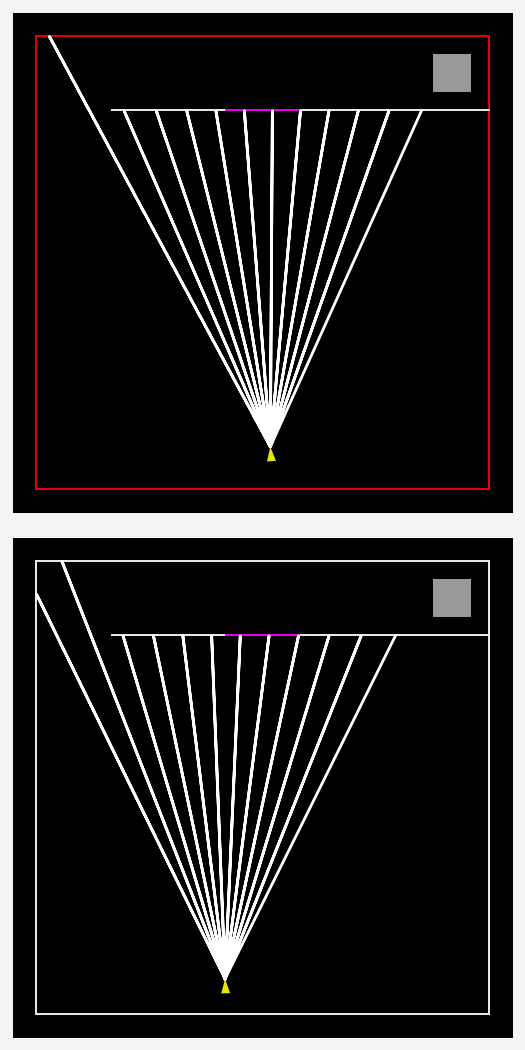

In [52]:
set_trajectory_plot_style()
fig, ax = pplt.subplots(nrows=2)
wall_colors = [1, 1.5]
for i, wc in enumerate(wall_colors):
    env = gym.make('ShortcutNav-v0', wall_colors=wc, shortcut_probability=0)
    env.reset()
    env.render('human', ax=ax[i])

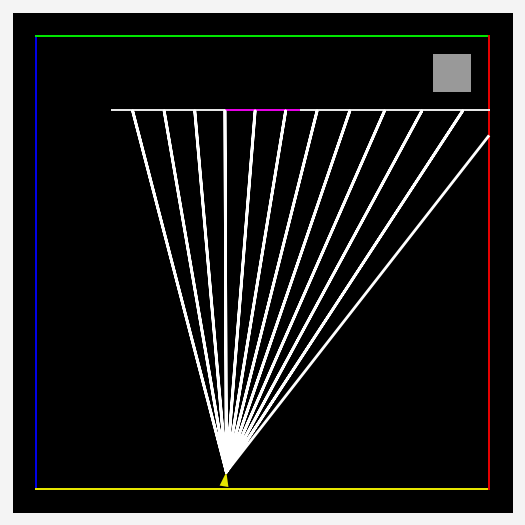

In [451]:
set_trajectory_plot_style()
fig, ax = pplt.subplots()
env = gym.make('ShortcutNav-v0', shortcut_probability=0)
env.reset()
env.render('human', ax=ax)

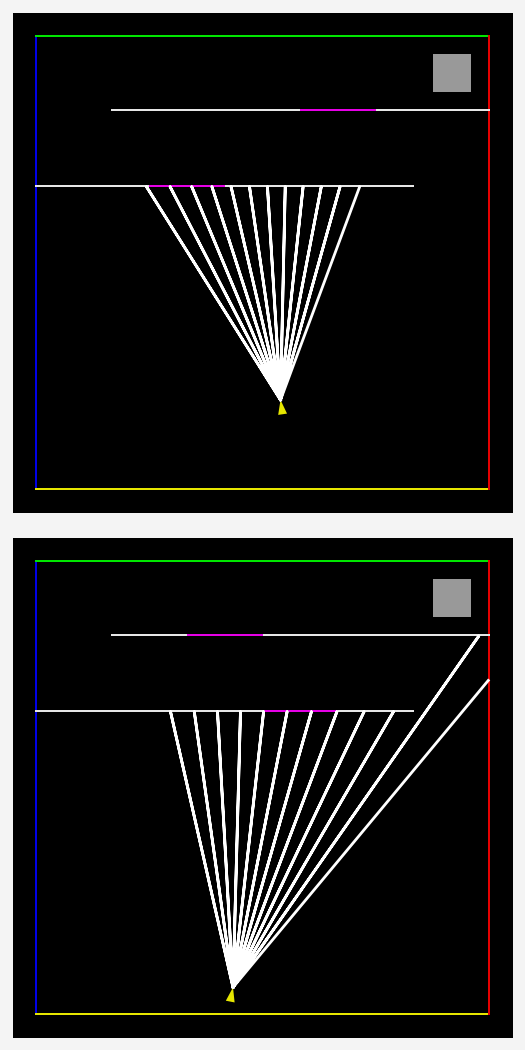

In [50]:
set_trajectory_plot_style()
fig, ax = pplt.subplots(nrows=2)
shortcut_configs = [2, 2.5]
for i, sc in enumerate(shortcut_configs):
    env = gym.make('ShortcutNav-v0', shortcut_config=sc, shortcut_probability=0)
    env.reset()
    env.render('human', ax=ax[i])

## Manual cluster example

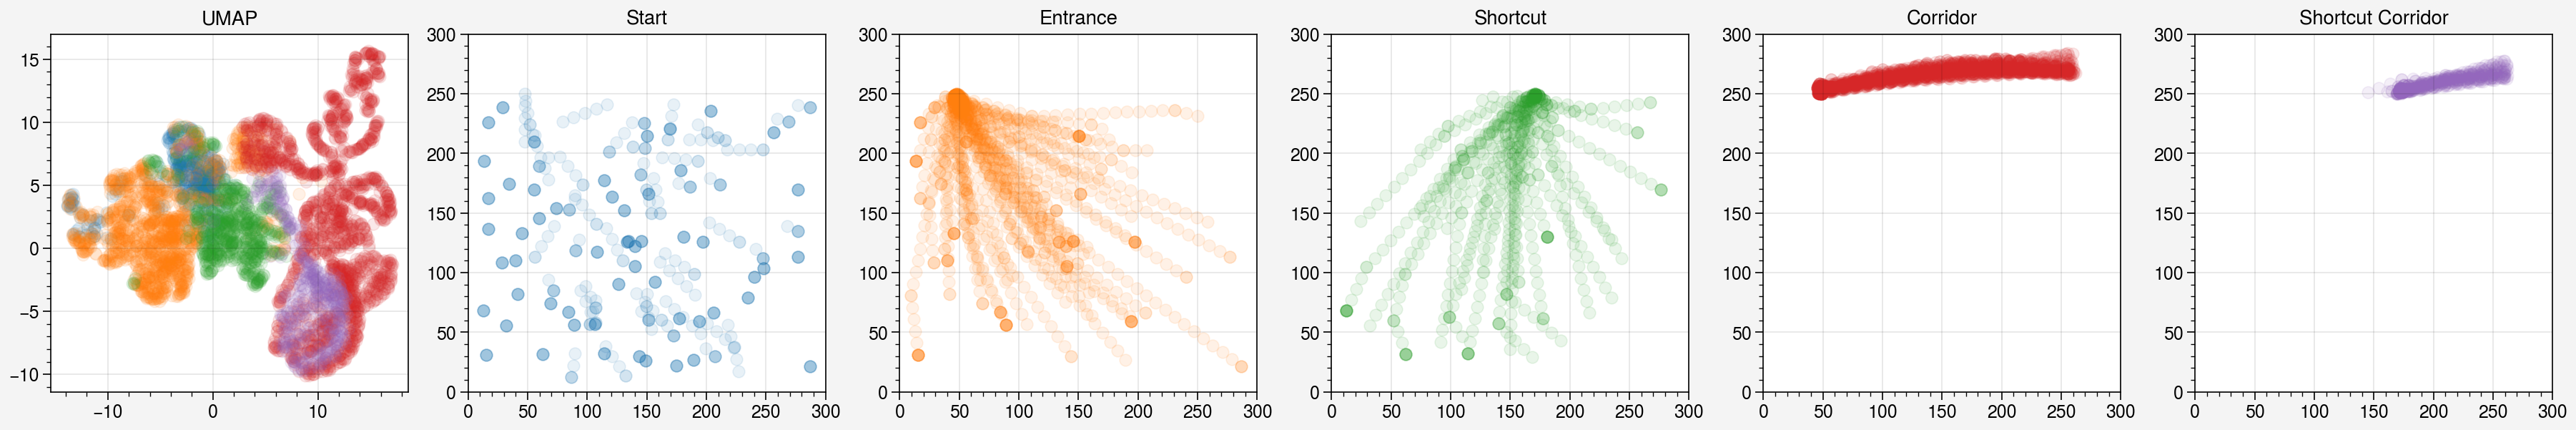

In [2]:
shortcut_res = pickle.load(open('data/shortcut/wc1.5_copied/0.4_0', 'rb'))

fig, ax = pplt.subplots(ncols=6, sharex=False, sharey=False)

res = shortcut_res[-1]
labels, no_cluster = decompose_shortcut_trajectories(res)
a = res['activ2d']
ax[0].scatter(a.T[0, no_cluster], a.T[1, no_cluster], color='gray', alpha=0.01)
kmeans_activ_pos_plot(res['pos'], res['activ2d'], labels=labels, ax=ax)

ax[1:].format(xlim=[0, 300], ylim=[0, 300])
ax.format(title=['UMAP', 'Start', 'Entrance', 'Shortcut', 'Corridor', 'Shortcut Corridor'])

# Silhouette Scores

## Pairwise silhouettes end of training

**4 Wall colors**

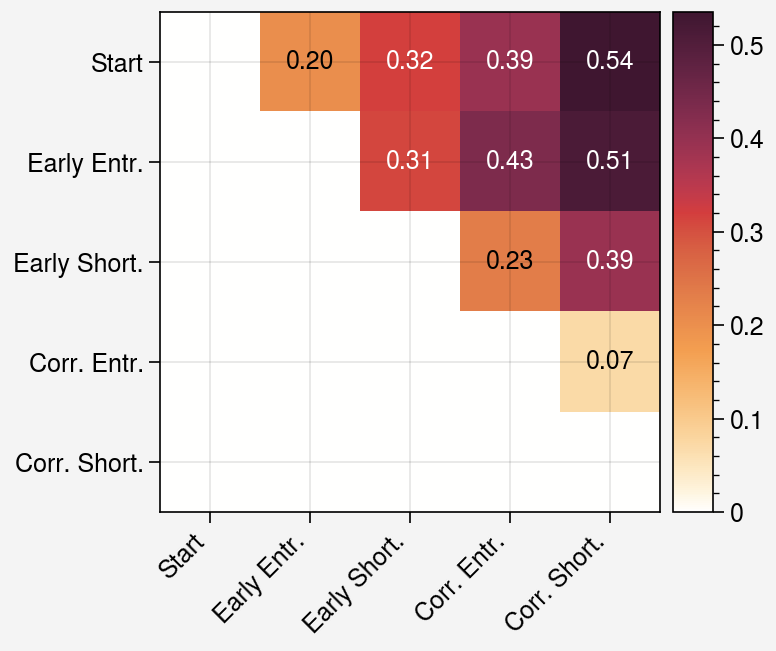

In [12]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64]
fig, ax = pplt.subplots()
pairwise_silscores = np.zeros((5, 5))
count = 0
for n, p in enumerate(probs):
    for m, batch in enumerate(batch_sizes):
        for i, j in itertools.product(range(5), range(5)):
            if j <= i:
                continue

            for t in range(3):
                key = f'{batch}_{p}_{t}'
                pairwise_silscores[i, j] += all_silscores[key][-1][i, j]
                if i == 1 and j == 2:
                    count += 1


cbar = ax.imshow(pairwise_silscores / count)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.3 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



**White wall color**

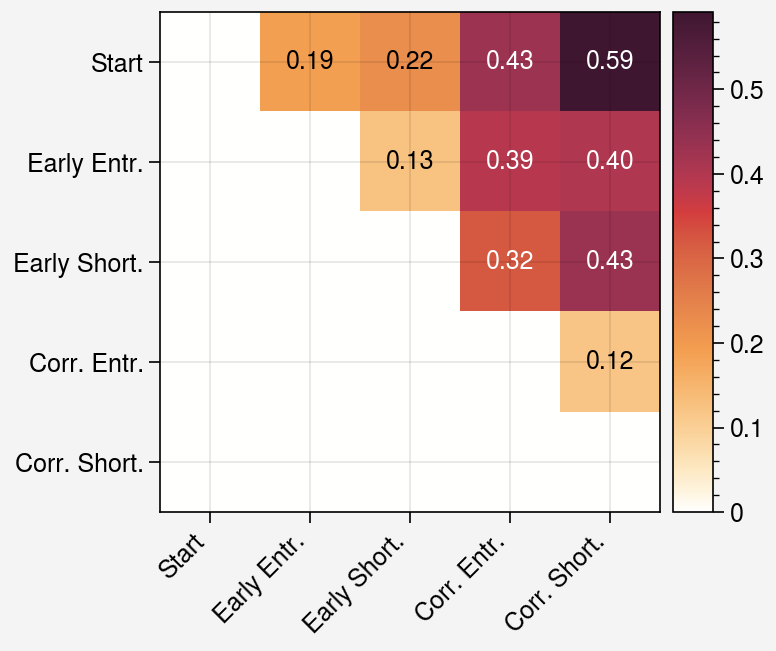

In [13]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
probs = [0.1, 0.2, 0.4]

fig, ax = pplt.subplots()

pairwise_silscores = np.zeros((5, 5))

count = 0
for n, p in enumerate(probs):
    for i, j in itertools.product(range(5), range(5)):
        if j <= i:
            continue
            
        for t in range(3):
            key = f'{p}_{t}'
            pairwise_silscores[i, j] += all_silscores[key][-1][i, j]
            if i == 1 and j == 2:
                count += 1


cbar = ax.imshow(pairwise_silscores / count)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.3 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



### Pairwise silhouettes change over training

**4 Wall colors**

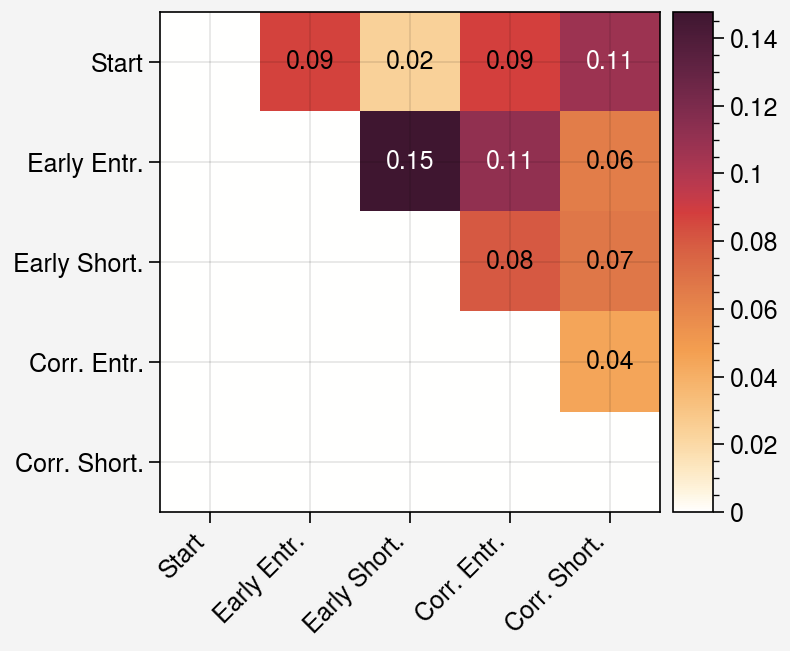

In [30]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64]
fig, ax = pplt.subplots()
pairwise_silscores = np.zeros((5, 5))
count = 0
for n, p in enumerate(probs):
    for m, batch in enumerate(batch_sizes):
        for i, j in itertools.product(range(5), range(5)):
            if j <= i:
                continue

            for t in range(3):
                key = f'{batch}_{p}_{t}'
                pairwise_silscores[i, j] += (all_silscores[key][-1][i, j] - all_silscores[key][0][i, j])
                if i == 1 and j == 2:
                    count += 1


cbar = ax.imshow(pairwise_silscores / count)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.1 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



**White wall color**

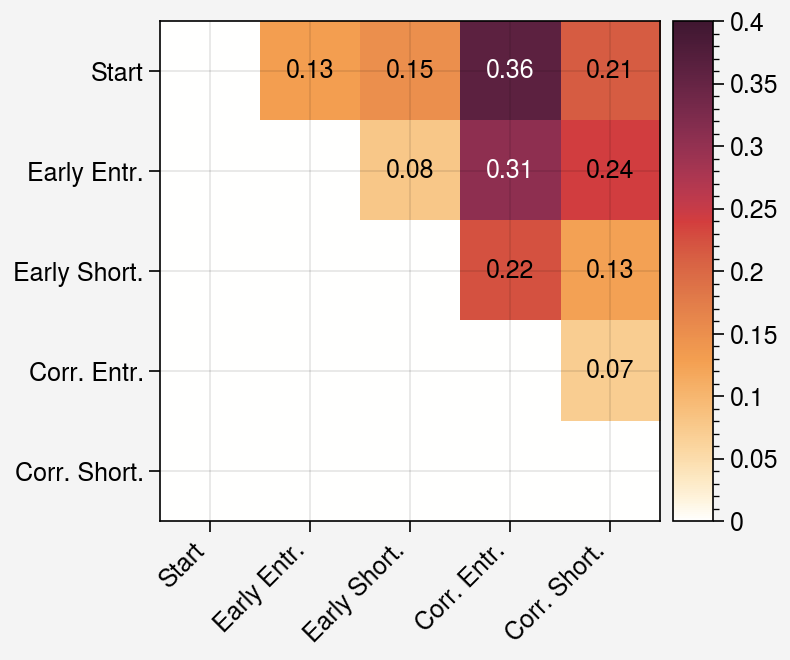

In [28]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
probs = [0.1, 0.2, 0.4]

fig, ax = pplt.subplots()

pairwise_silscores = np.zeros((5, 5))

count = 0
for n, p in enumerate(probs):
    for i, j in itertools.product(range(5), range(5)):
        if j <= i:
            continue
            
        for t in range(3):
            key = f'{p}_{t}'
            pairwise_silscores[i, j] += (all_silscores[key][-1][i, j] - all_silscores[key][0][i, j])
            if i == 1 and j == 2:
                count += 1


cbar = ax.imshow(pairwise_silscores / count, vmin=0, vmax=0.4)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.3 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



## Pairwise silhouettes no umap

**4 Wall colors**

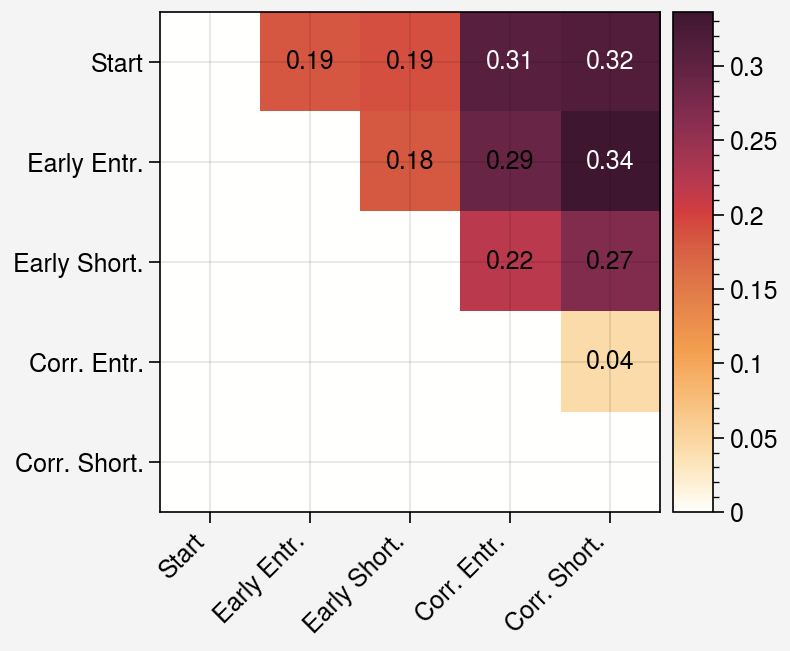

In [34]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores_noumap', 'rb'))
probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64]
fig, ax = pplt.subplots()
pairwise_silscores = np.zeros((5, 5))
count = 0
for n, p in enumerate(probs):
    for m, batch in enumerate(batch_sizes):
        for i, j in itertools.product(range(5), range(5)):
            if j <= i:
                continue

            for t in range(3):
                key = f'{batch}_{p}_{t}'
                pairwise_silscores[i, j] += all_silscores[key][-1][i, j]
                if i == 1 and j == 2:
                    count += 1


cbar = ax.imshow(pairwise_silscores / count)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.3 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



**White wall color**

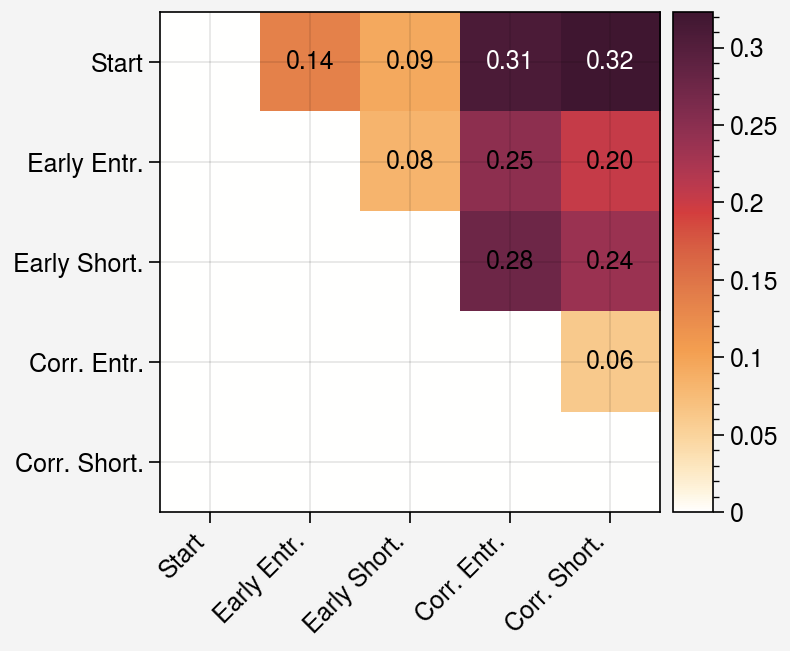

In [36]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores_noumap', 'rb'))
probs = [0.1, 0.2, 0.4]

fig, ax = pplt.subplots()

pairwise_silscores = np.zeros((5, 5))

count = 0
for n, p in enumerate(probs):
    for i, j in itertools.product(range(5), range(5)):
        if j <= i:
            continue
            
        for t in range(3):
            key = f'{p}_{t}'
            pairwise_silscores[i, j] += all_silscores[key][-1][i, j]
            if i == 1 and j == 2:
                count += 1


cbar = ax.imshow(pairwise_silscores / count)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.3 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



### Pairwise silhouettes change over training

**4 Wall colors**

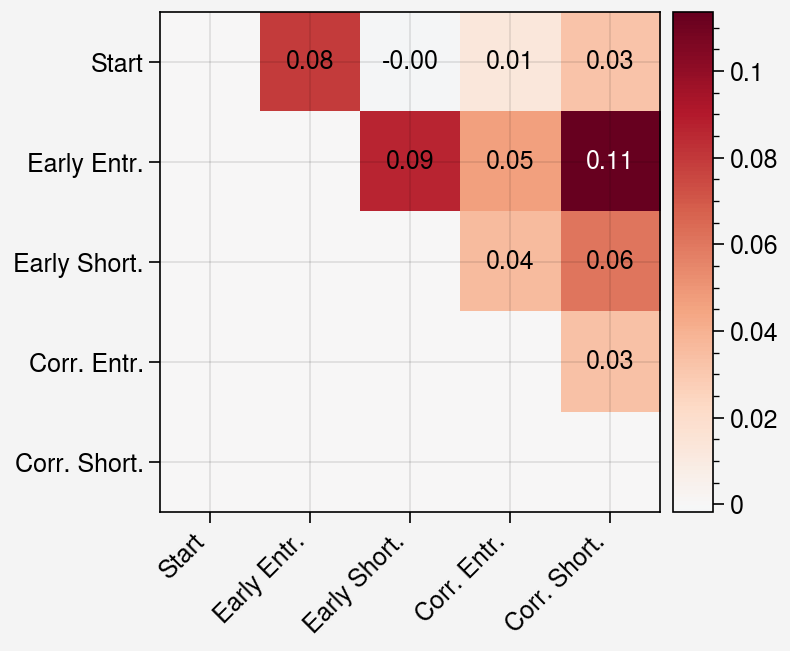

In [37]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores_noumap', 'rb'))
probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64]
fig, ax = pplt.subplots()
pairwise_silscores = np.zeros((5, 5))
count = 0
for n, p in enumerate(probs):
    for m, batch in enumerate(batch_sizes):
        for i, j in itertools.product(range(5), range(5)):
            if j <= i:
                continue

            for t in range(3):
                key = f'{batch}_{p}_{t}'
                pairwise_silscores[i, j] += (all_silscores[key][-1][i, j] - all_silscores[key][0][i, j])
                if i == 1 and j == 2:
                    count += 1


cbar = ax.imshow(pairwise_silscores / count)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.1 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



**White wall color**

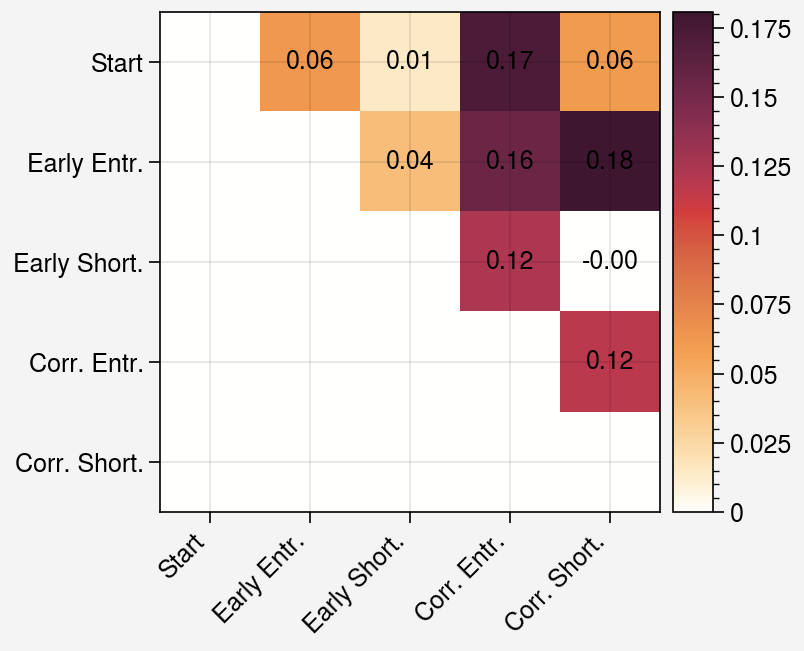

In [39]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores_noumap', 'rb'))
probs = [0.1, 0.2, 0.4]

fig, ax = pplt.subplots()

pairwise_silscores = np.zeros((5, 5))

count = 0
for n, p in enumerate(probs):
    for i, j in itertools.product(range(5), range(5)):
        if j <= i:
            continue
            
        for t in range(3):
            key = f'{p}_{t}'
            pairwise_silscores[i, j] += (all_silscores[key][-1][i, j] - all_silscores[key][0][i, j])
            if i == 1 and j == 2:
                count += 1


cbar = ax.imshow(pairwise_silscores / count, vmin=0,)
ax.colorbar(cbar)

for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    score = pairwise_silscores[i, j]/count
    color = 'white' if score > 0.3 else 'black'
    ax.text(j, i, f'{score:.2f}', ha='center', va='center', color=color)

ax.format(xformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], xlocator=range(5),
          xrotation=45,
          yformatter=['Start', 'Early Entr.', 'Early Short.','Corr. Entr.', 'Corr. Short.'], ylocator=range(5))



## Shortcut use rate vs. Mean silhouette score across training

**4 Wall colors**

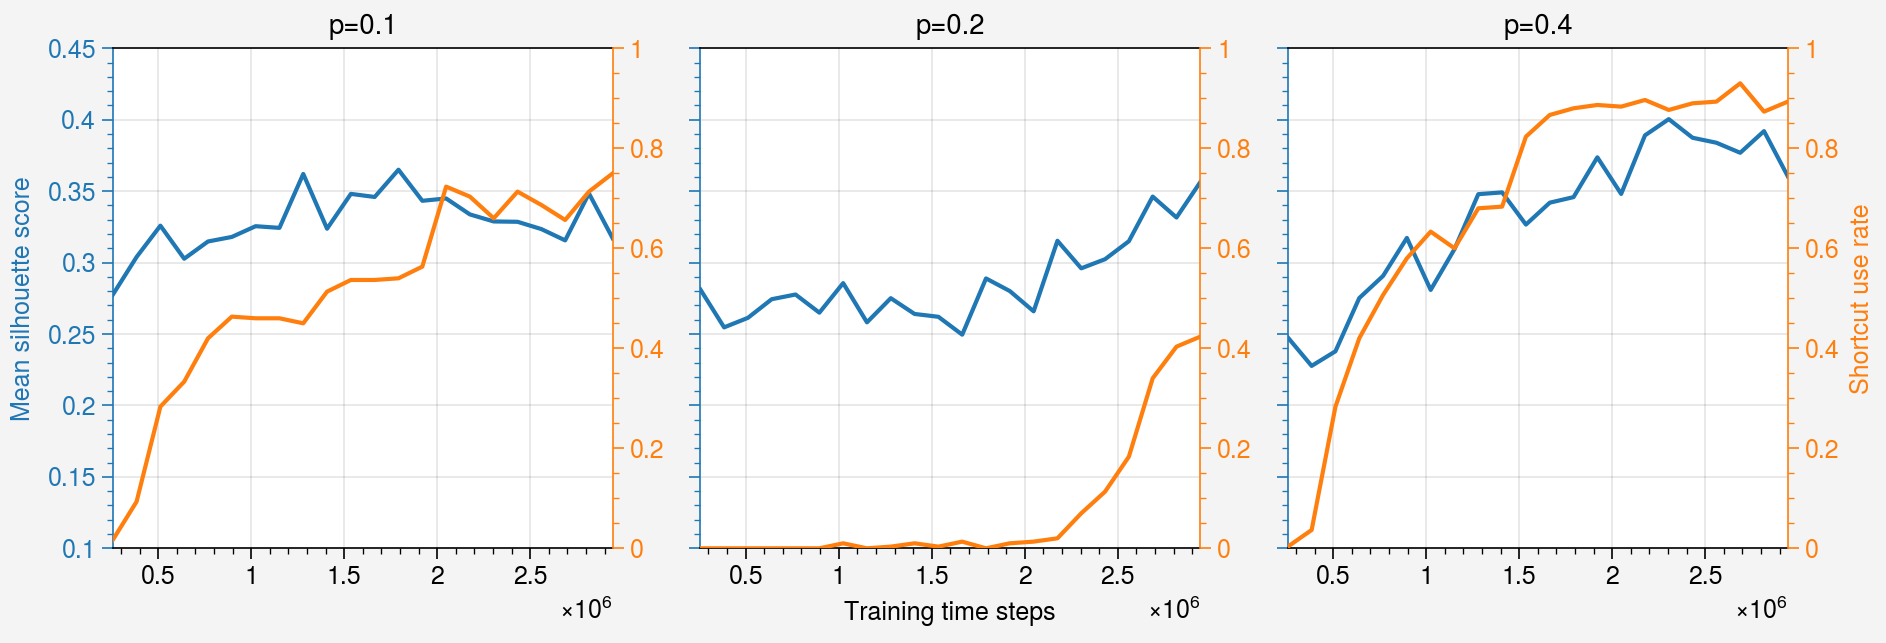

In [19]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
batch = 64

fig, ax = pplt.subplots(ncols=3)
dual = ax.dualy(lambda y: (y-0.1) / 0.35, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for i, j in itertools.product(range(5), range(5)):
        if j <= i:
            continue
            
        for t in range(3):
            key = f'{batch}_{p}_{t}'
            scores = []
            for chk in range(num_chks):
                scores.append(all_silscores[key][chk][i, j])
            ys.append(scores)
            ys2.append(all_shortcut_use_rates[key])
        
    lines = []
    ys = np.mean(ys, axis=0)
    lines.append(ax[n].plot(chks*64*100, ys, label='Mean silhouette score', color=rgb_colors[0]))
    ys2 = np.mean(ys2, axis=0)
    lines.append(dual[n].plot(chks*64*100, ys2, label='Shortcut use rate', color=rgb_colors[1]))
        
ax.format(title=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0.1, 0.45], ycolor=hex_colors[0], ylabel='Mean silhouette score')
dual[-1].format(ylabel='Shortcut use rate')


Check change in heatmaps for whether this is only population or has individual node contribution. E.g., hotspots around shortcut location, but also differences in those heatmaps across training (since throughout we put them on conserved trajectories so visual input is constant)

Look into why p=0.1 4 wall color agents don't follow the trend, see how consistent trend is

**4 Wall colors longer training**

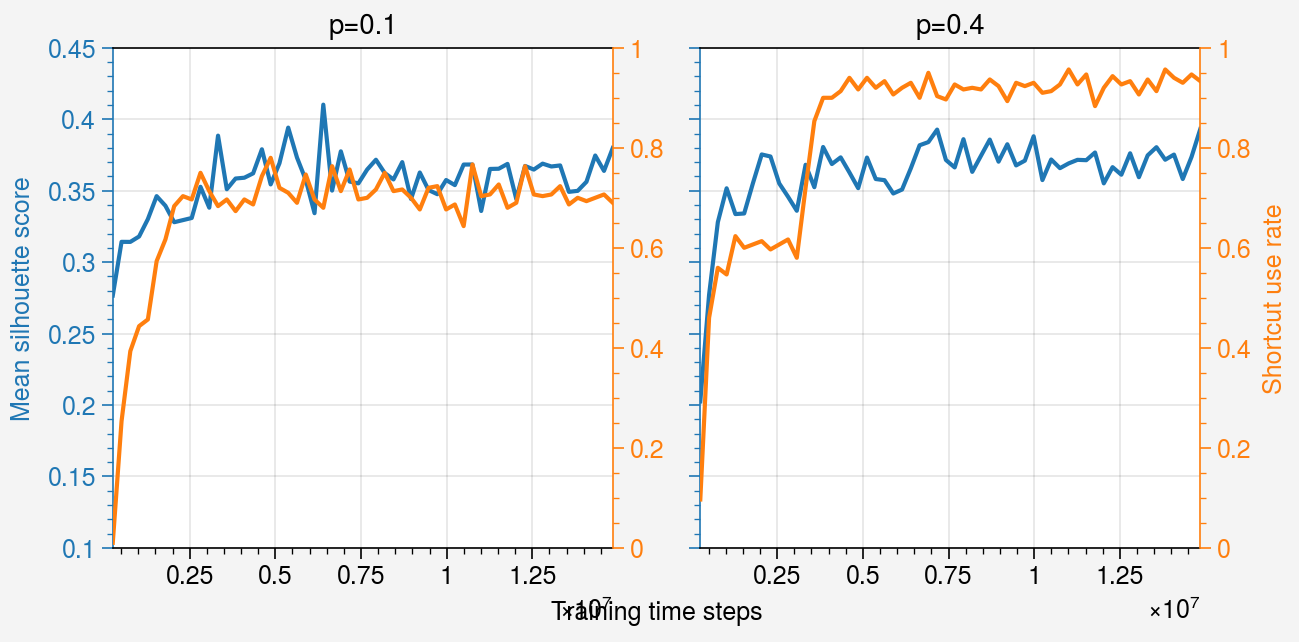

In [22]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied_longer/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4longer_userates', 'rb'))
chks = np.arange(40, 2340, 40)
probs = [0.1, 0.4]
batch = 64

fig, ax = pplt.subplots(ncols=2)
dual = ax.dualy(lambda y: (y-0.1) / 0.35, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for i, j in itertools.product(range(5), range(5)):
        if j <= i:
            continue
            
        for t in range(3):
            key = f'{batch}_{p}_{t}'
            scores = []
            for chk in range(num_chks):
                scores.append(all_silscores[key][chk][i, j])
            ys.append(scores)
            ys2.append(all_shortcut_use_rates[key])
        
    lines = []
    ys = np.mean(ys, axis=0)
    lines.append(ax[n].plot(chks*64*100, ys, label='Mean silhouette score', color=rgb_colors[0]))
    ys2 = np.mean(ys2, axis=0)
    lines.append(dual[n].plot(chks*64*100, ys2, label='Shortcut use rate', color=rgb_colors[1]))
        
ax.format(title=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0.1, 0.45], ycolor=hex_colors[0], ylabel='Mean silhouette score')
dual[-1].format(ylabel='Shortcut use rate')


**White wall color**

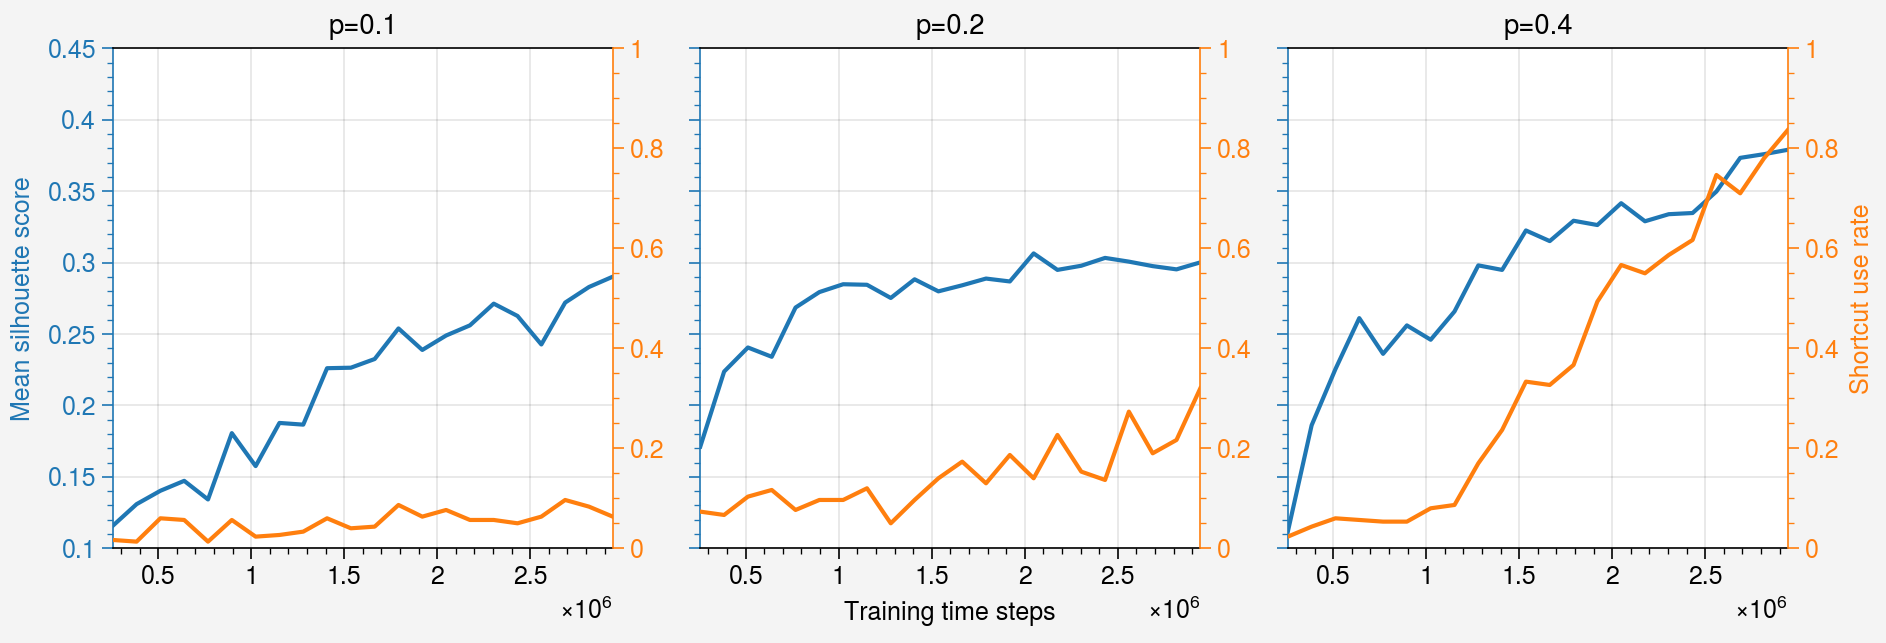

In [18]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]


fig, ax = pplt.subplots(ncols=3)
dual = ax.dualy(lambda y: (y-0.1) / 0.35, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for i, j in itertools.product(range(5), range(5)):
        if j <= i:
            continue
            
        for t in range(3):
            key = f'{p}_{t}'
            scores = []
            for chk in range(num_chks):
                scores.append(all_silscores[key][chk][i, j])
            ys.append(scores)
            ys2.append(all_shortcut_use_rates[key])
        
    lines = []
    ys = np.mean(ys, axis=0)
    lines.append(ax[n].plot(chks*64*100, ys, label='Mean silhouette score', color=rgb_colors[0]))
    ys2 = np.mean(ys2, axis=0)
    lines.append(dual[n].plot(chks*64*100, ys2, label='Shortcut use rate', color=rgb_colors[1]))
        
ax.format(title=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0.1, 0.45], ycolor=hex_colors[0], ylabel='Mean silhouette score')
dual[-1].format(ylabel='Shortcut use rate')


## Shortcut use rate. vs Green/Orange silhouette score

**4 Wall colors**

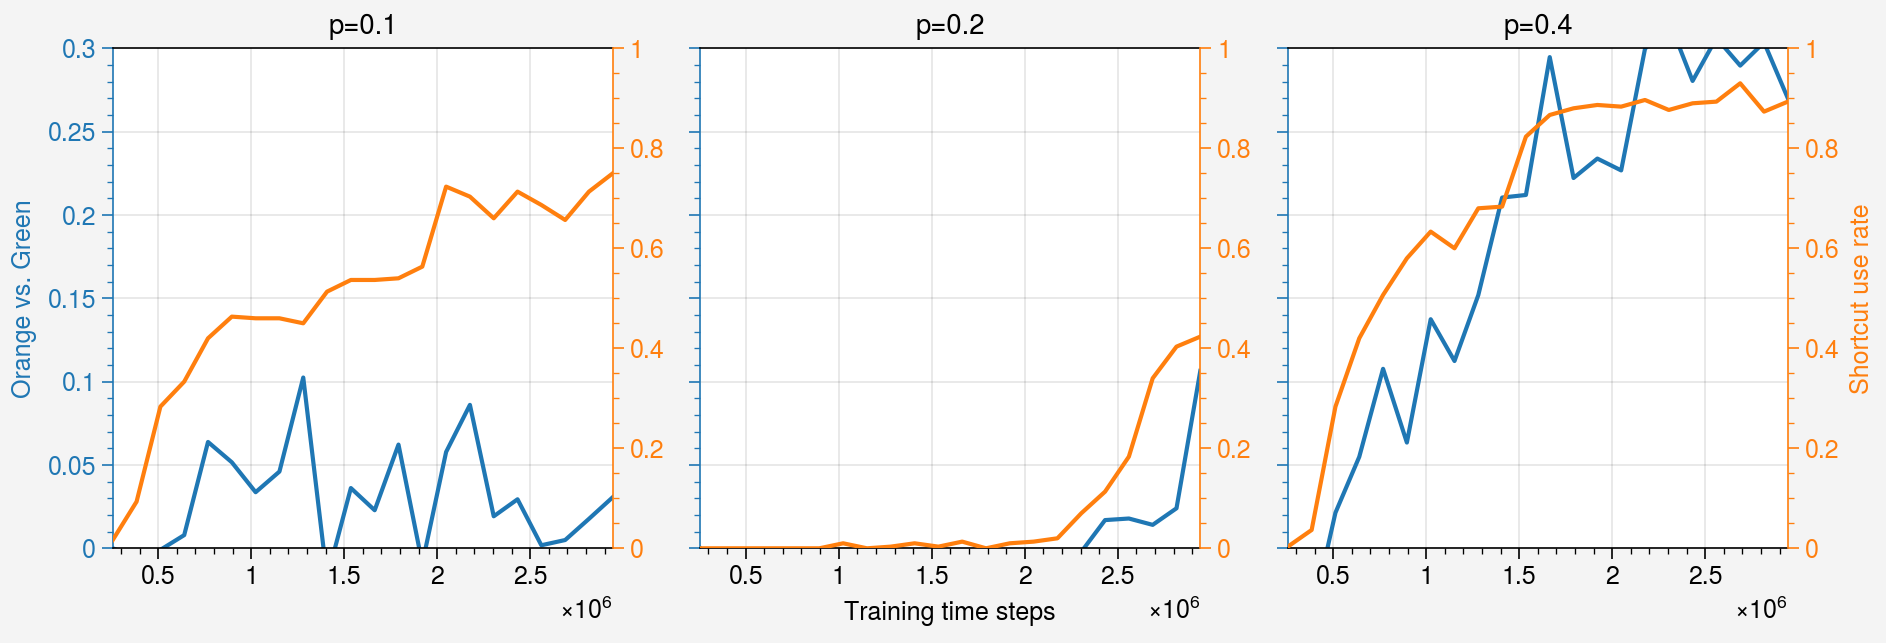

In [9]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
batch = 64

fig, ax = pplt.subplots(ncols=3)
dual = ax.dualy(lambda y: (y) / 0.3, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{batch}_{p}_{t}'
        scores = []
        for chk in range(num_chks):
            scores.append(all_silscores[key][chk][1, 2] - all_silscores[key][0][1, 2])
        ys.append(scores)
        ys2.append(all_shortcut_use_rates[key])
        
    lines = []
    ys = np.mean(ys, axis=0)
    lines.append(ax[n].plot(chks*64*100, ys, label='Mean silhouette score', color=rgb_colors[0]))
    ys2 = np.mean(ys2, axis=0)
    lines.append(dual[n].plot(chks*64*100, ys2, label='Shortcut use rate', color=rgb_colors[1]))
        
ax.format(title=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.3], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


**White wall color**

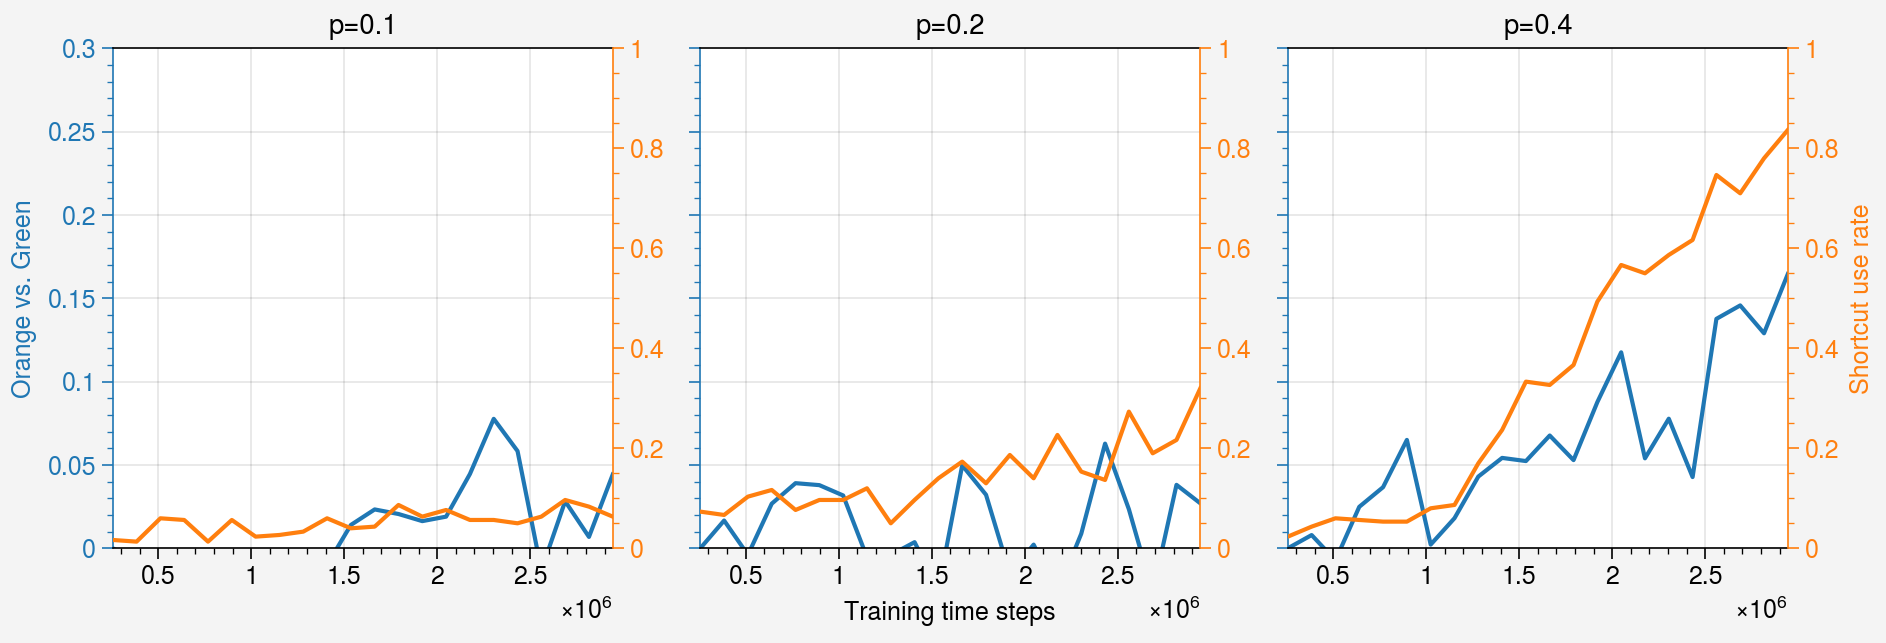

In [10]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]

fig, ax = pplt.subplots(ncols=3)
dual = ax.dualy(lambda y: (y) / 0.3, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{p}_{t}'
        scores = []
        for chk in range(num_chks):
            scores.append(all_silscores[key][chk][1, 2] - all_silscores[key][0][1, 2])
        ys.append(scores)
        ys2.append(all_shortcut_use_rates[key])
        
    lines = []
    ys = np.mean(ys, axis=0)
    lines.append(ax[n].plot(chks*64*100, ys, label='Mean silhouette score', color=rgb_colors[0]))
    ys2 = np.mean(ys2, axis=0)
    lines.append(dual[n].plot(chks*64*100, ys2, label='Shortcut use rate', color=rgb_colors[1]))
        
ax.format(title=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.3], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


## Shortcut use rate vs. Green/Orange silhouette individual agents

**4 Wall colors**

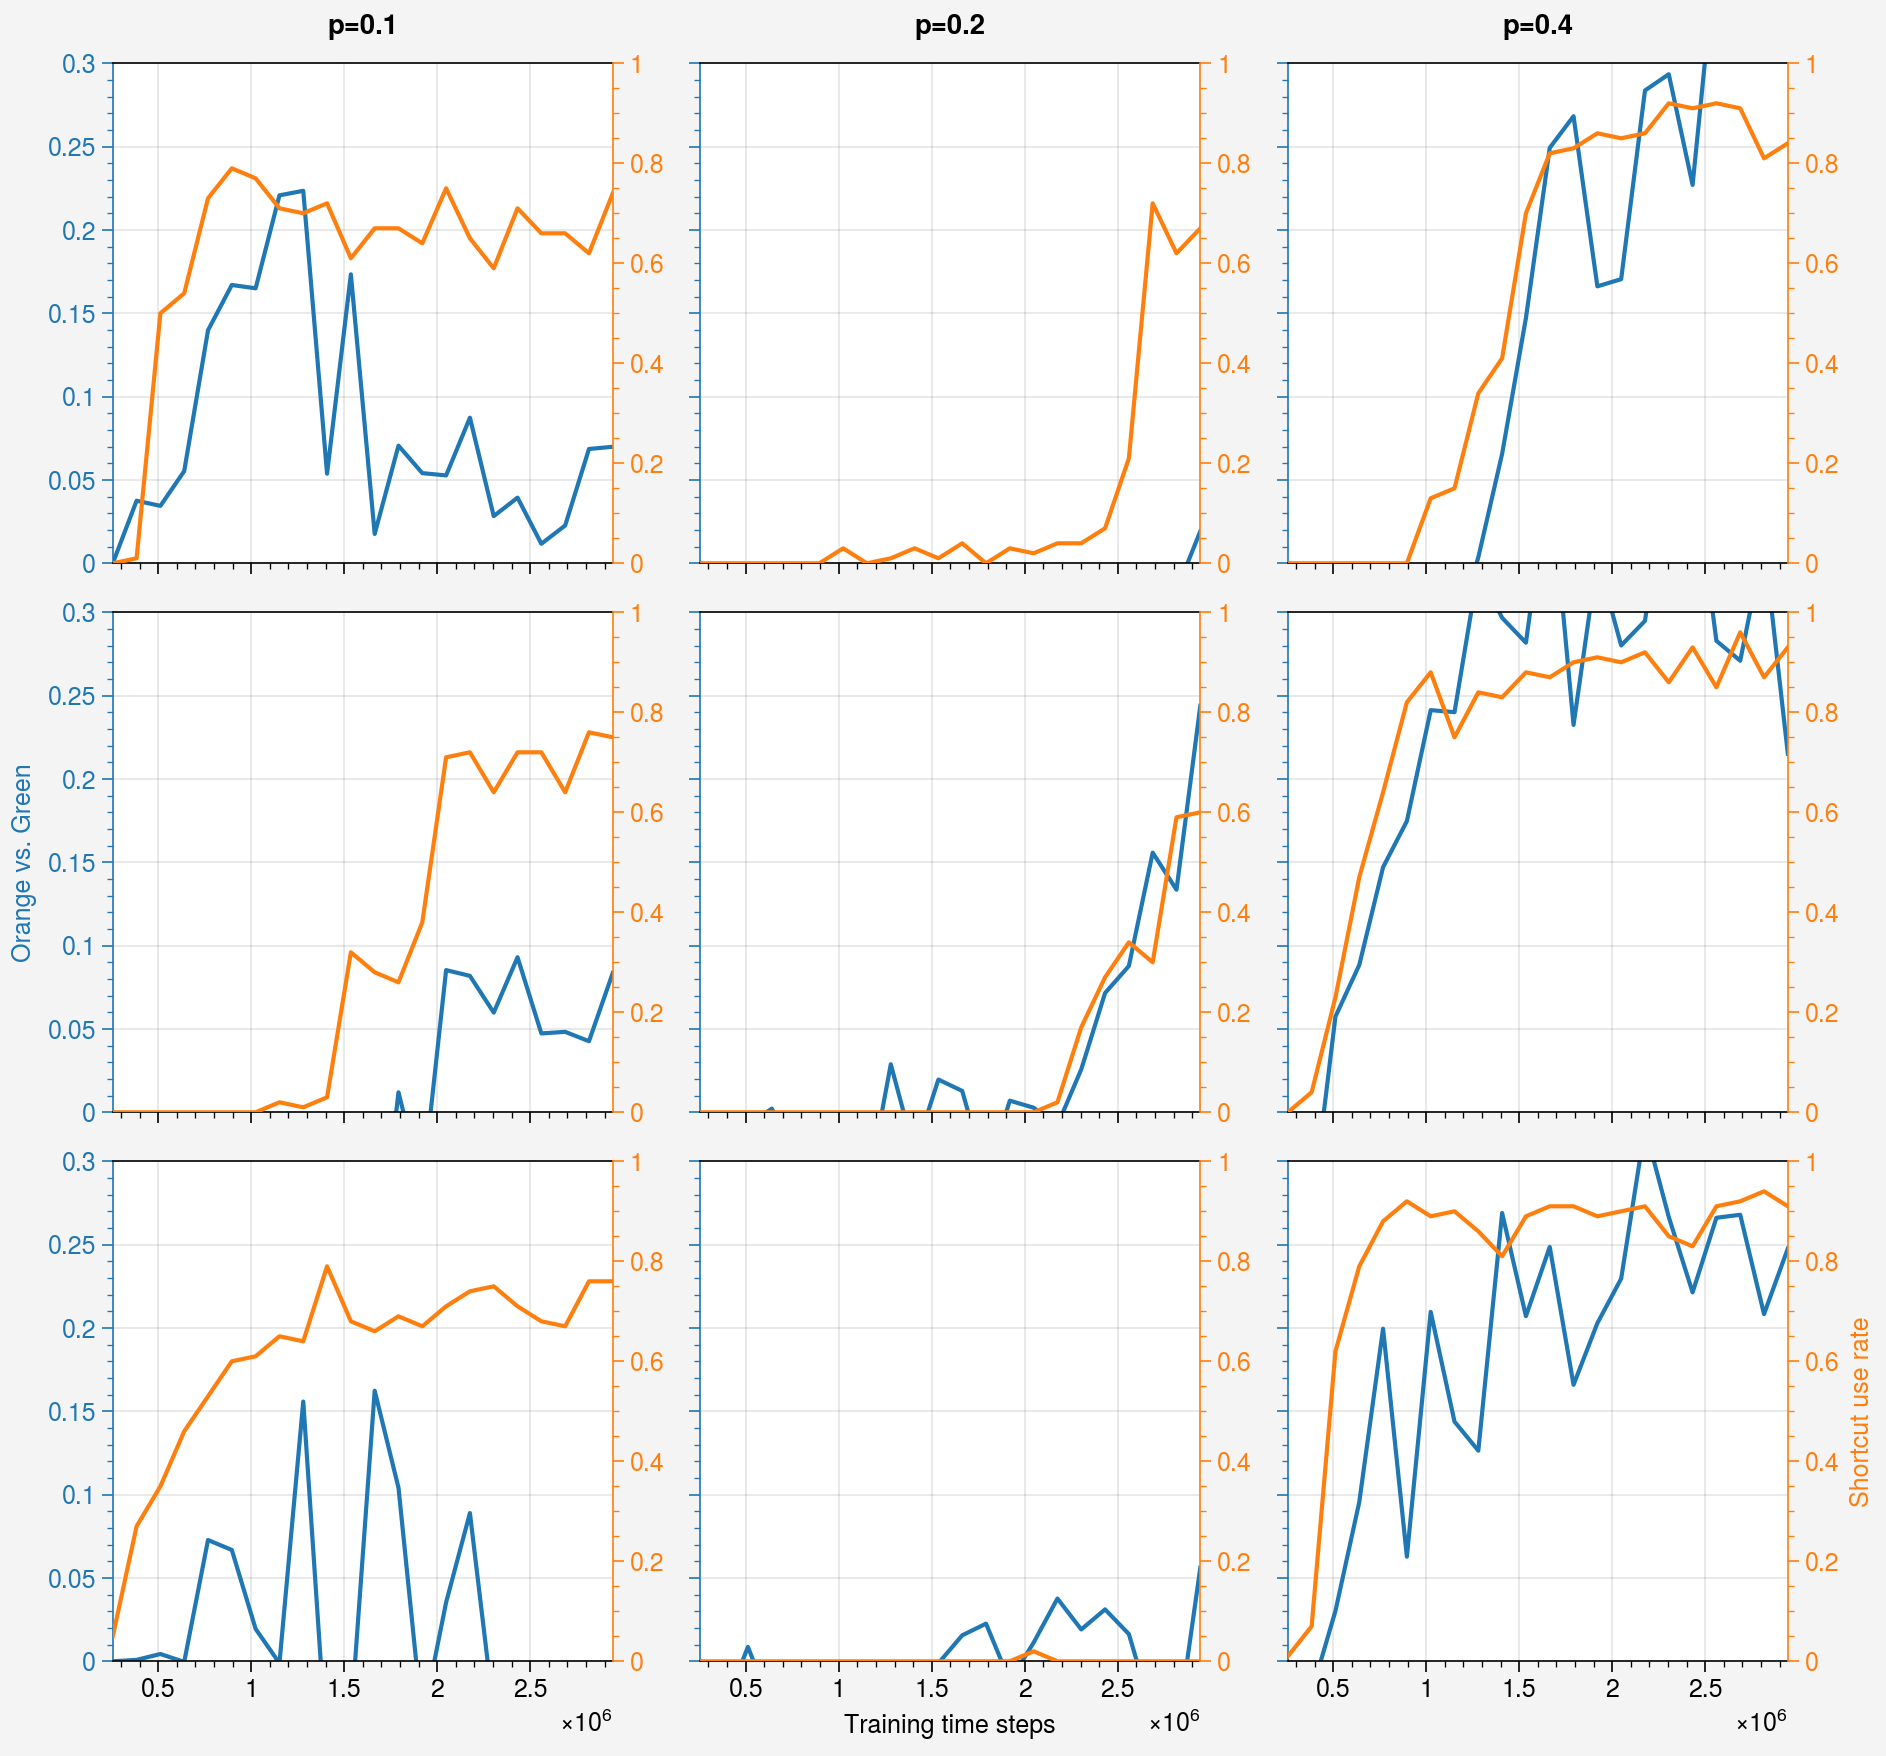

In [16]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
batch = 64

fig, ax = pplt.subplots(ncols=3, nrows=3)
dual = ax.dualy(lambda y: (y) / 0.3, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{batch}_{p}_{t}'
        scores = []
        for chk in range(num_chks):
            scores.append(all_silscores[key][chk][1, 2] - all_silscores[key][0][1, 2])
            # scores.append(all_silscores[key][chk][1, 2])
            
        ax[t, n].plot(chks*64*100, scores, label='Mean silhouette score', 
                      color=rgb_colors[0])
        dual[t, n].plot(chks*64*100, all_shortcut_use_rates[key], 
                        label='Shortcut use rate', color=rgb_colors[1])
                
ax.format(toplabels=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.3], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


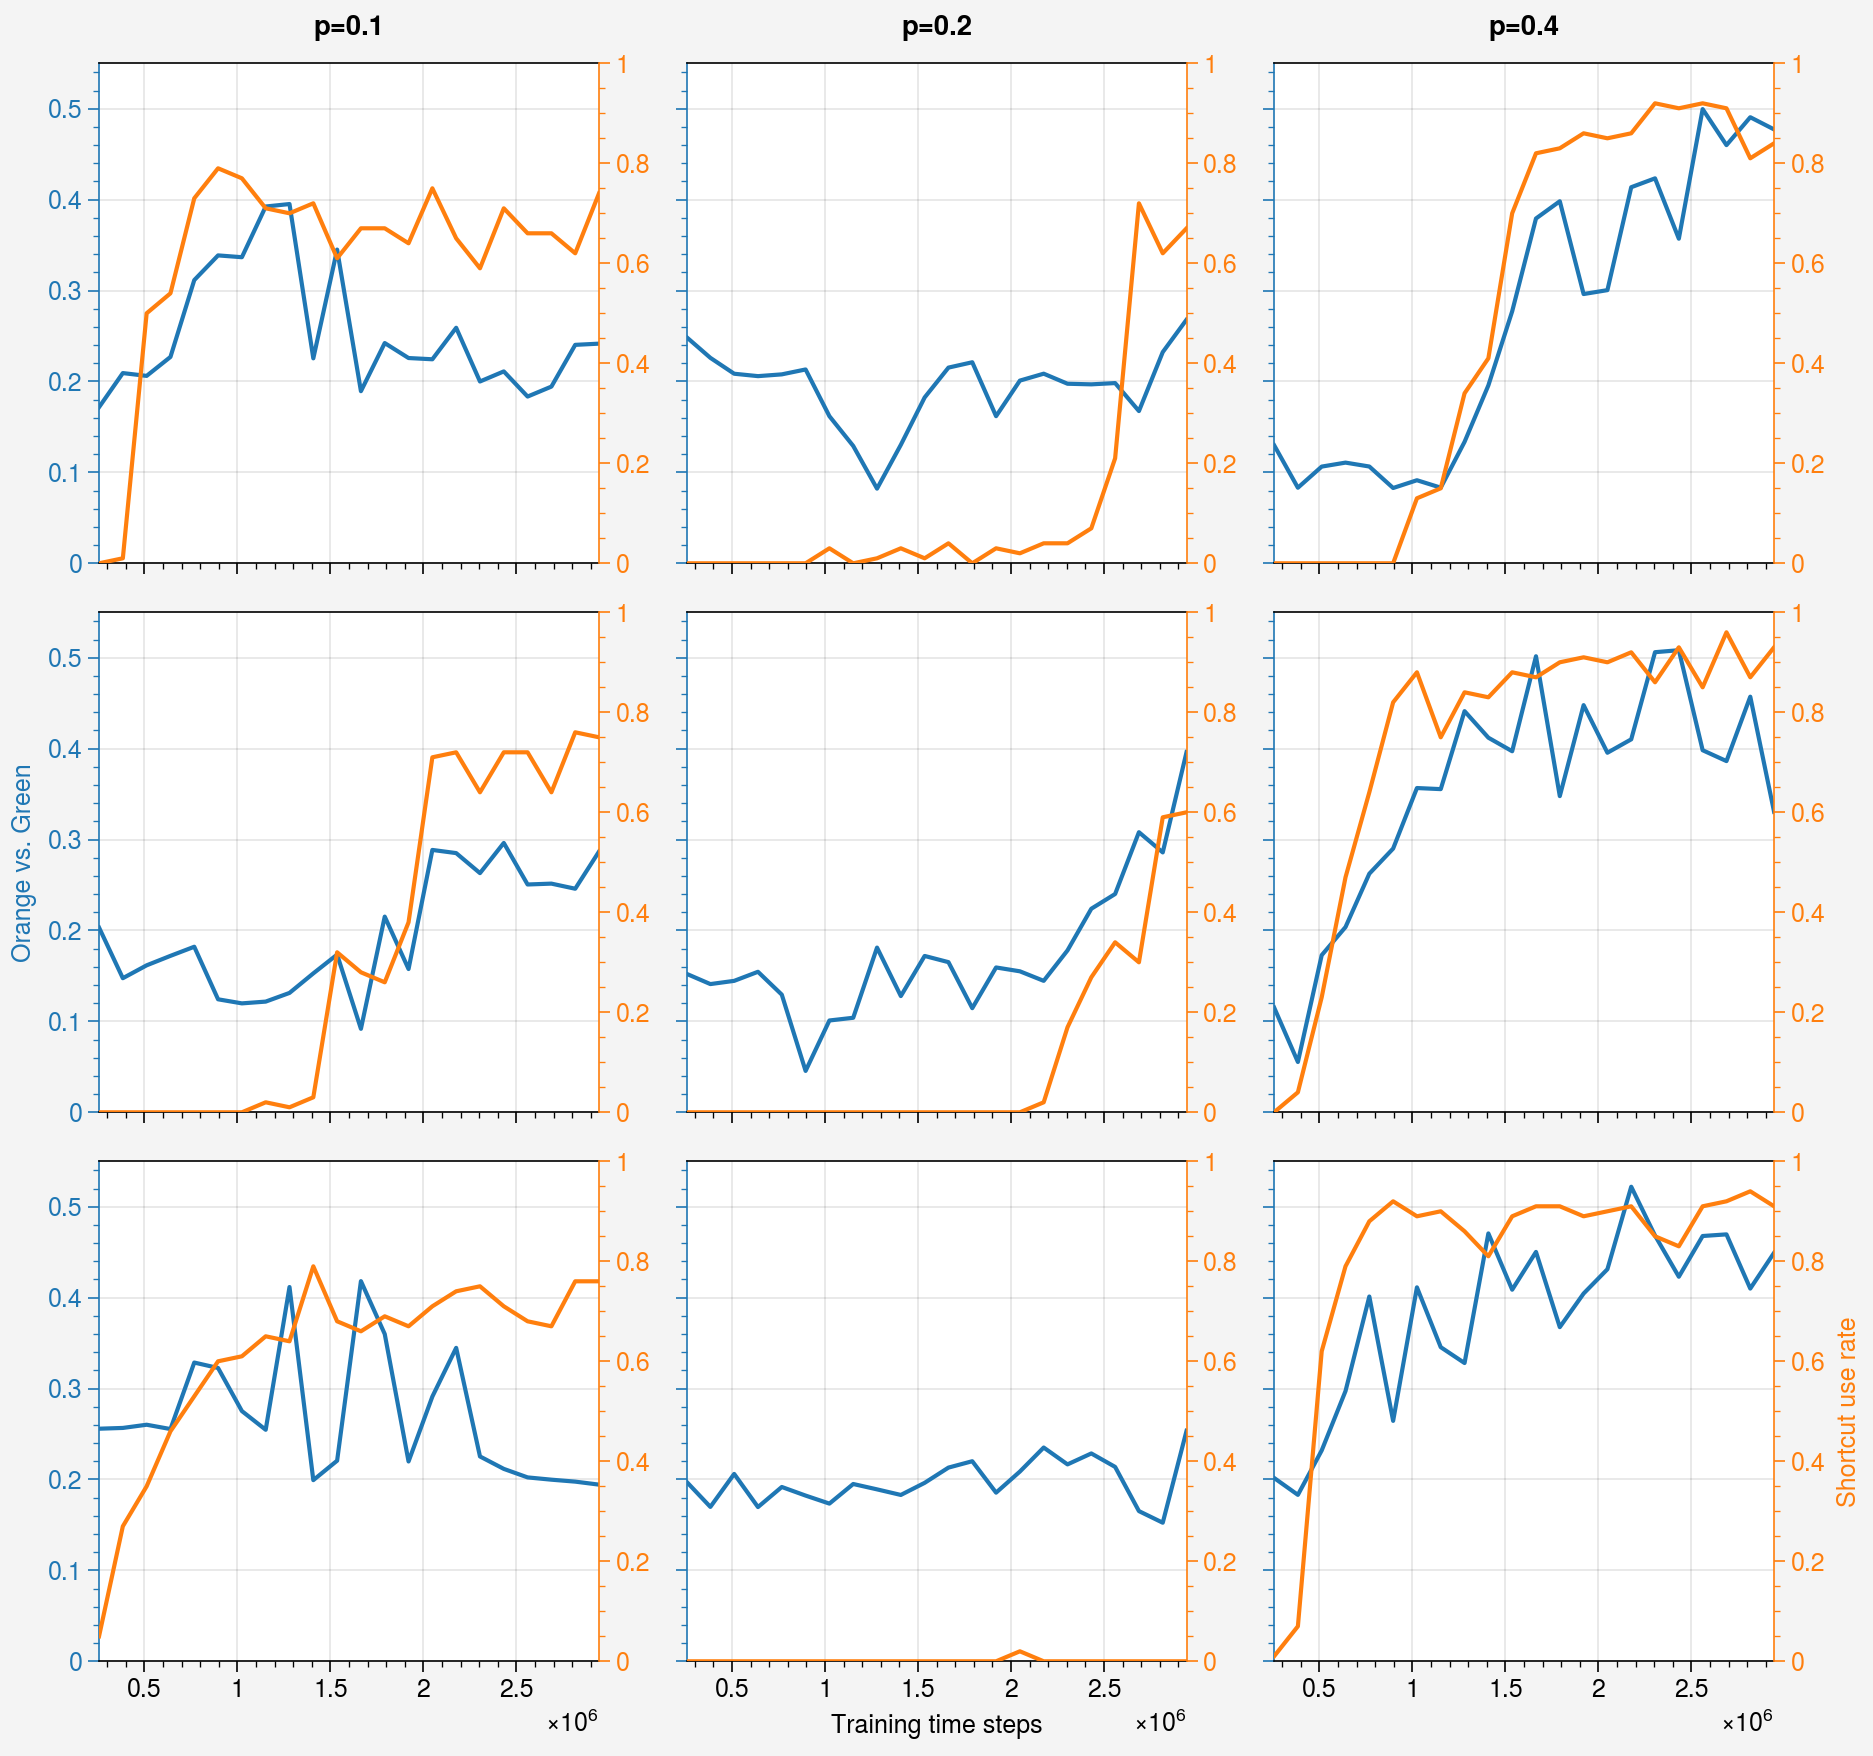

In [19]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
batch = 64

fig, ax = pplt.subplots(ncols=3, nrows=3)
dual = ax.dualy(lambda y: (y) / 0.55, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{batch}_{p}_{t}'
        scores = []
        for chk in range(num_chks):
            # scores.append(all_silscores[key][chk][1, 2] - all_silscores[key][0][1, 2])
            scores.append(all_silscores[key][chk][1, 2])
            
        ax[t, n].plot(chks*64*100, scores, label='Mean silhouette score', 
                      color=rgb_colors[0])
        dual[t, n].plot(chks*64*100, all_shortcut_use_rates[key], 
                        label='Shortcut use rate', color=rgb_colors[1])
                
ax.format(toplabels=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.55], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


**4 wall colors longer**

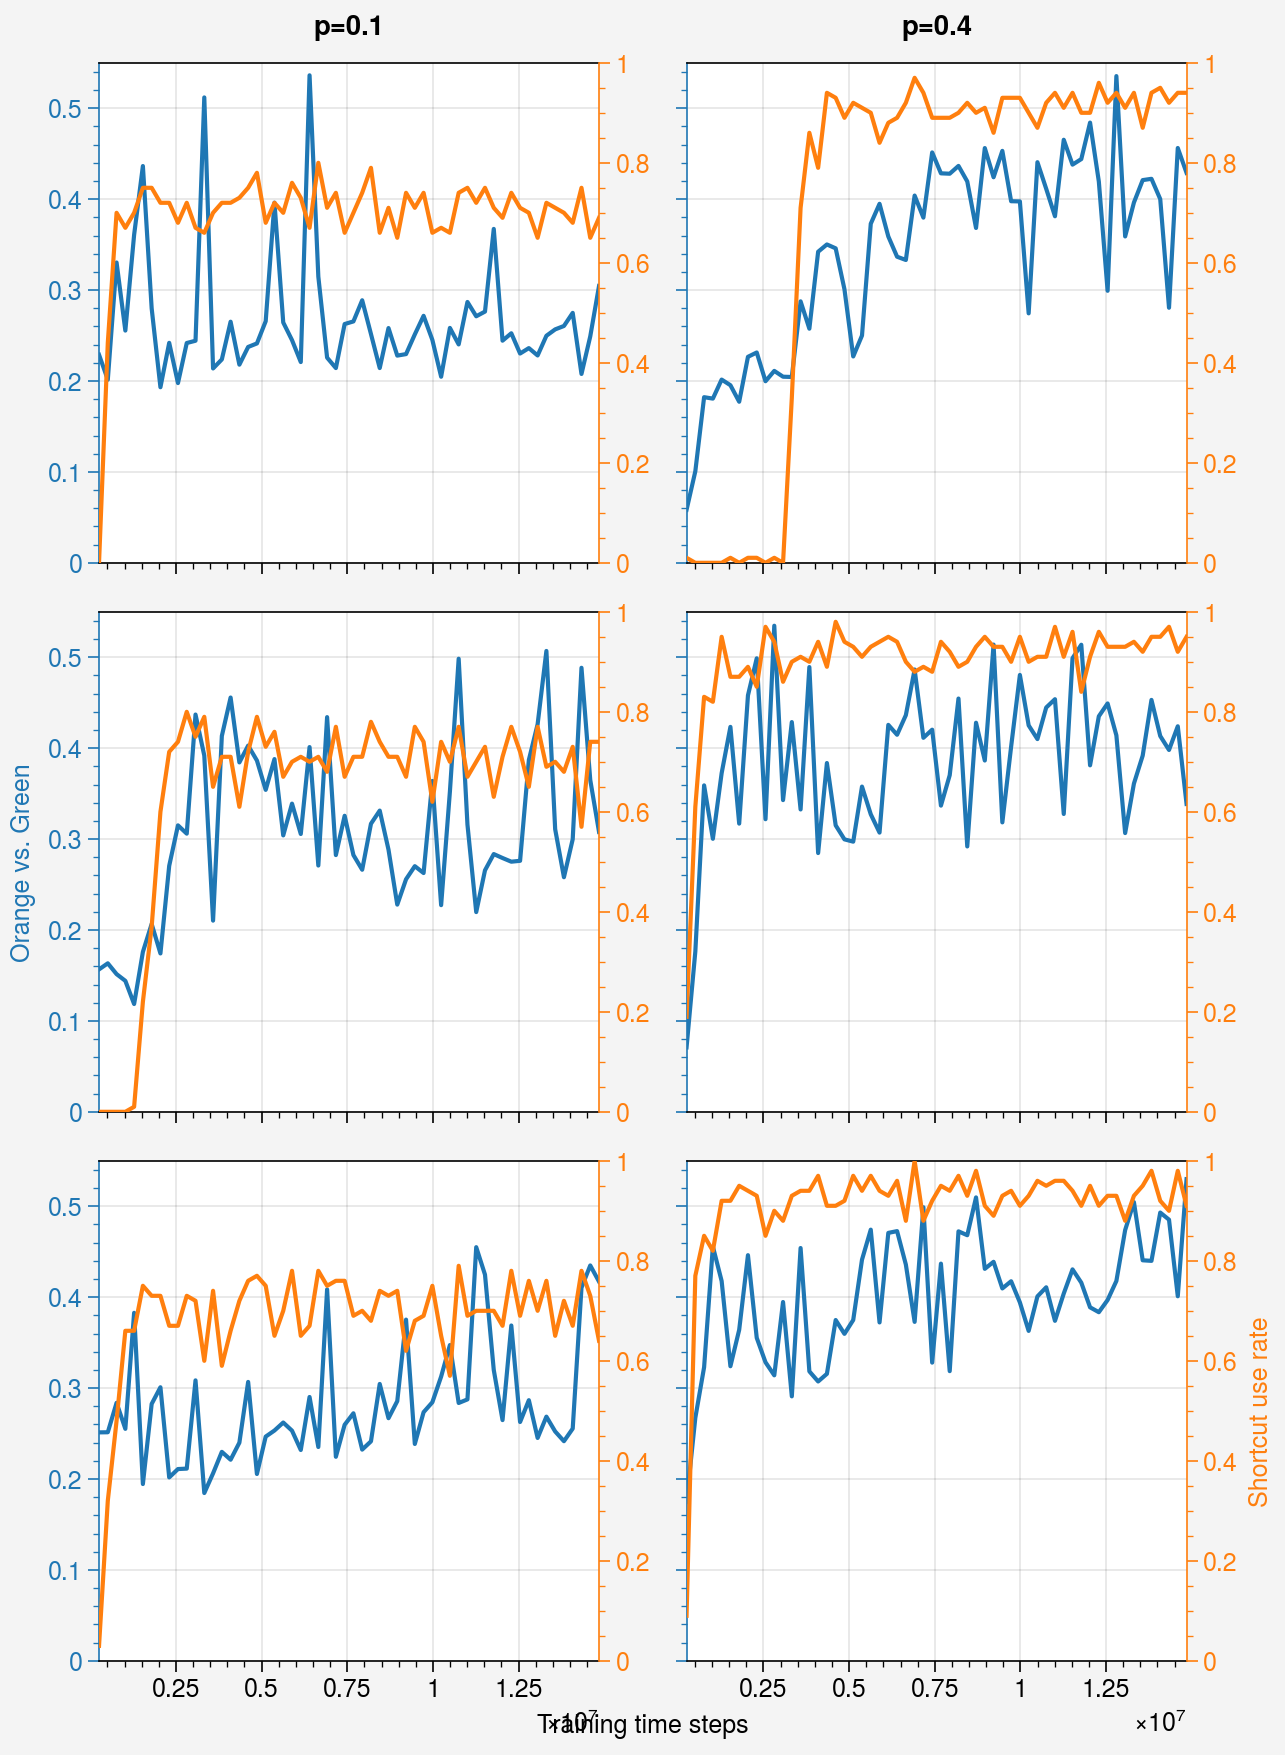

In [23]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied_longer/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4longer_userates', 'rb'))
chks = np.arange(40, 2340, 40)
probs = [0.1, 0.4]
batch = 64

fig, ax = pplt.subplots(ncols=2, nrows=3)
dual = ax.dualy(lambda y: (y) / 0.55, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{batch}_{p}_{t}'
        scores = []
        for chk in range(num_chks):
            # scores.append(all_silscores[key][chk][1, 2] - all_silscores[key][0][1, 2])
            scores.append(all_silscores[key][chk][1, 2])
            
        ax[t, n].plot(chks*64*100, scores, label='Mean silhouette score', 
                      color=rgb_colors[0])
        dual[t, n].plot(chks*64*100, all_shortcut_use_rates[key], 
                        label='Shortcut use rate', color=rgb_colors[1])
                
ax.format(toplabels=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.55], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


**White wall color**

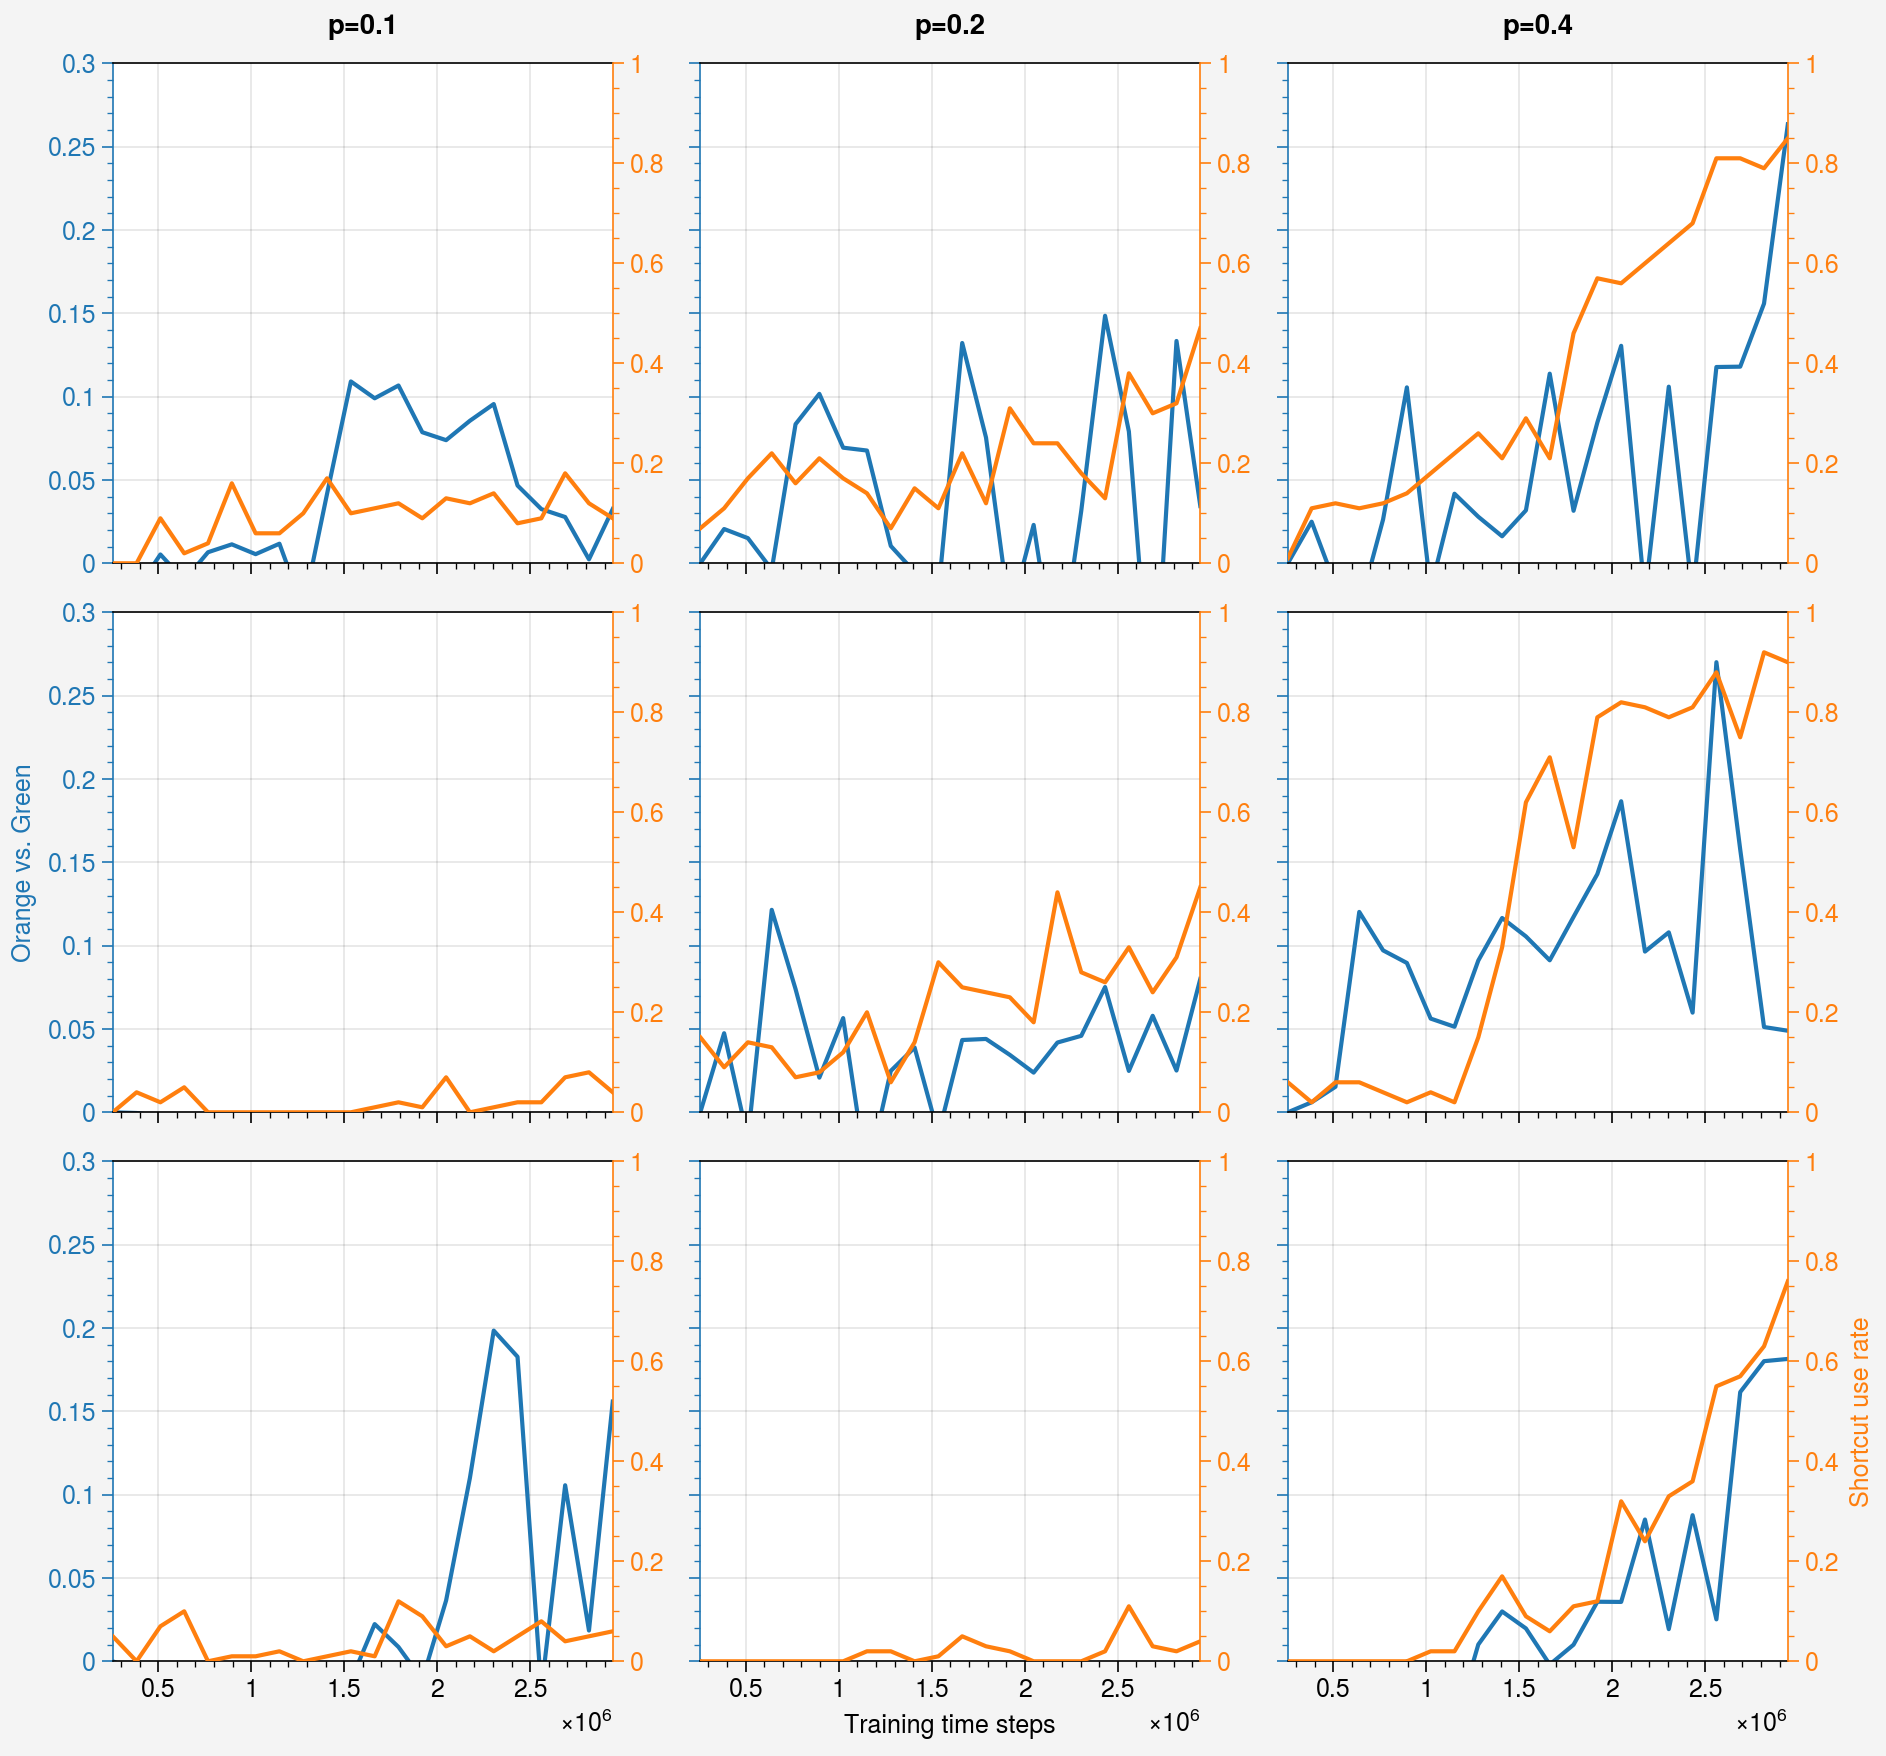

In [17]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]

fig, ax = pplt.subplots(ncols=3, nrows=3)
dual = ax.dualy(lambda y: (y) / 0.3, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{p}_{t}'
        scores = []
        for chk in range(num_chks):
            scores.append(all_silscores[key][chk][1, 2] - all_silscores[key][0][1, 2])
            
        ax[t, n].plot(chks*64*100, scores, label='Mean silhouette score', 
                      color=rgb_colors[0])
        dual[t, n].plot(chks*64*100, all_shortcut_use_rates[key], 
                        label='Shortcut use rate', color=rgb_colors[1])
                
ax.format(toplabels=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.3], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


In [ ]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)

probs = [0.1, 0.2, 0.4]

fig, ax = pplt.subplots(ncols=3, nrows=3)
dual = ax.dualy(lambda y: (y) / 0.3, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{p}_{t}'
        scores = []
        for chk in range(num_chks):
            # scores.append(all_silscores[key][chk][1, 2] - all_silscores[key][0][1, 2])
            scores.append(all_silscores[key][chk][1, 2])
            
        ax[t, n].plot(chks*64*100, scores, label='Mean silhouette score', 
                      color=rgb_colors[0])
        dual[t, n].plot(chks*64*100, all_shortcut_use_rates[key], 
                        label='Shortcut use rate', color=rgb_colors[1])
                
ax.format(toplabels=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.3], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


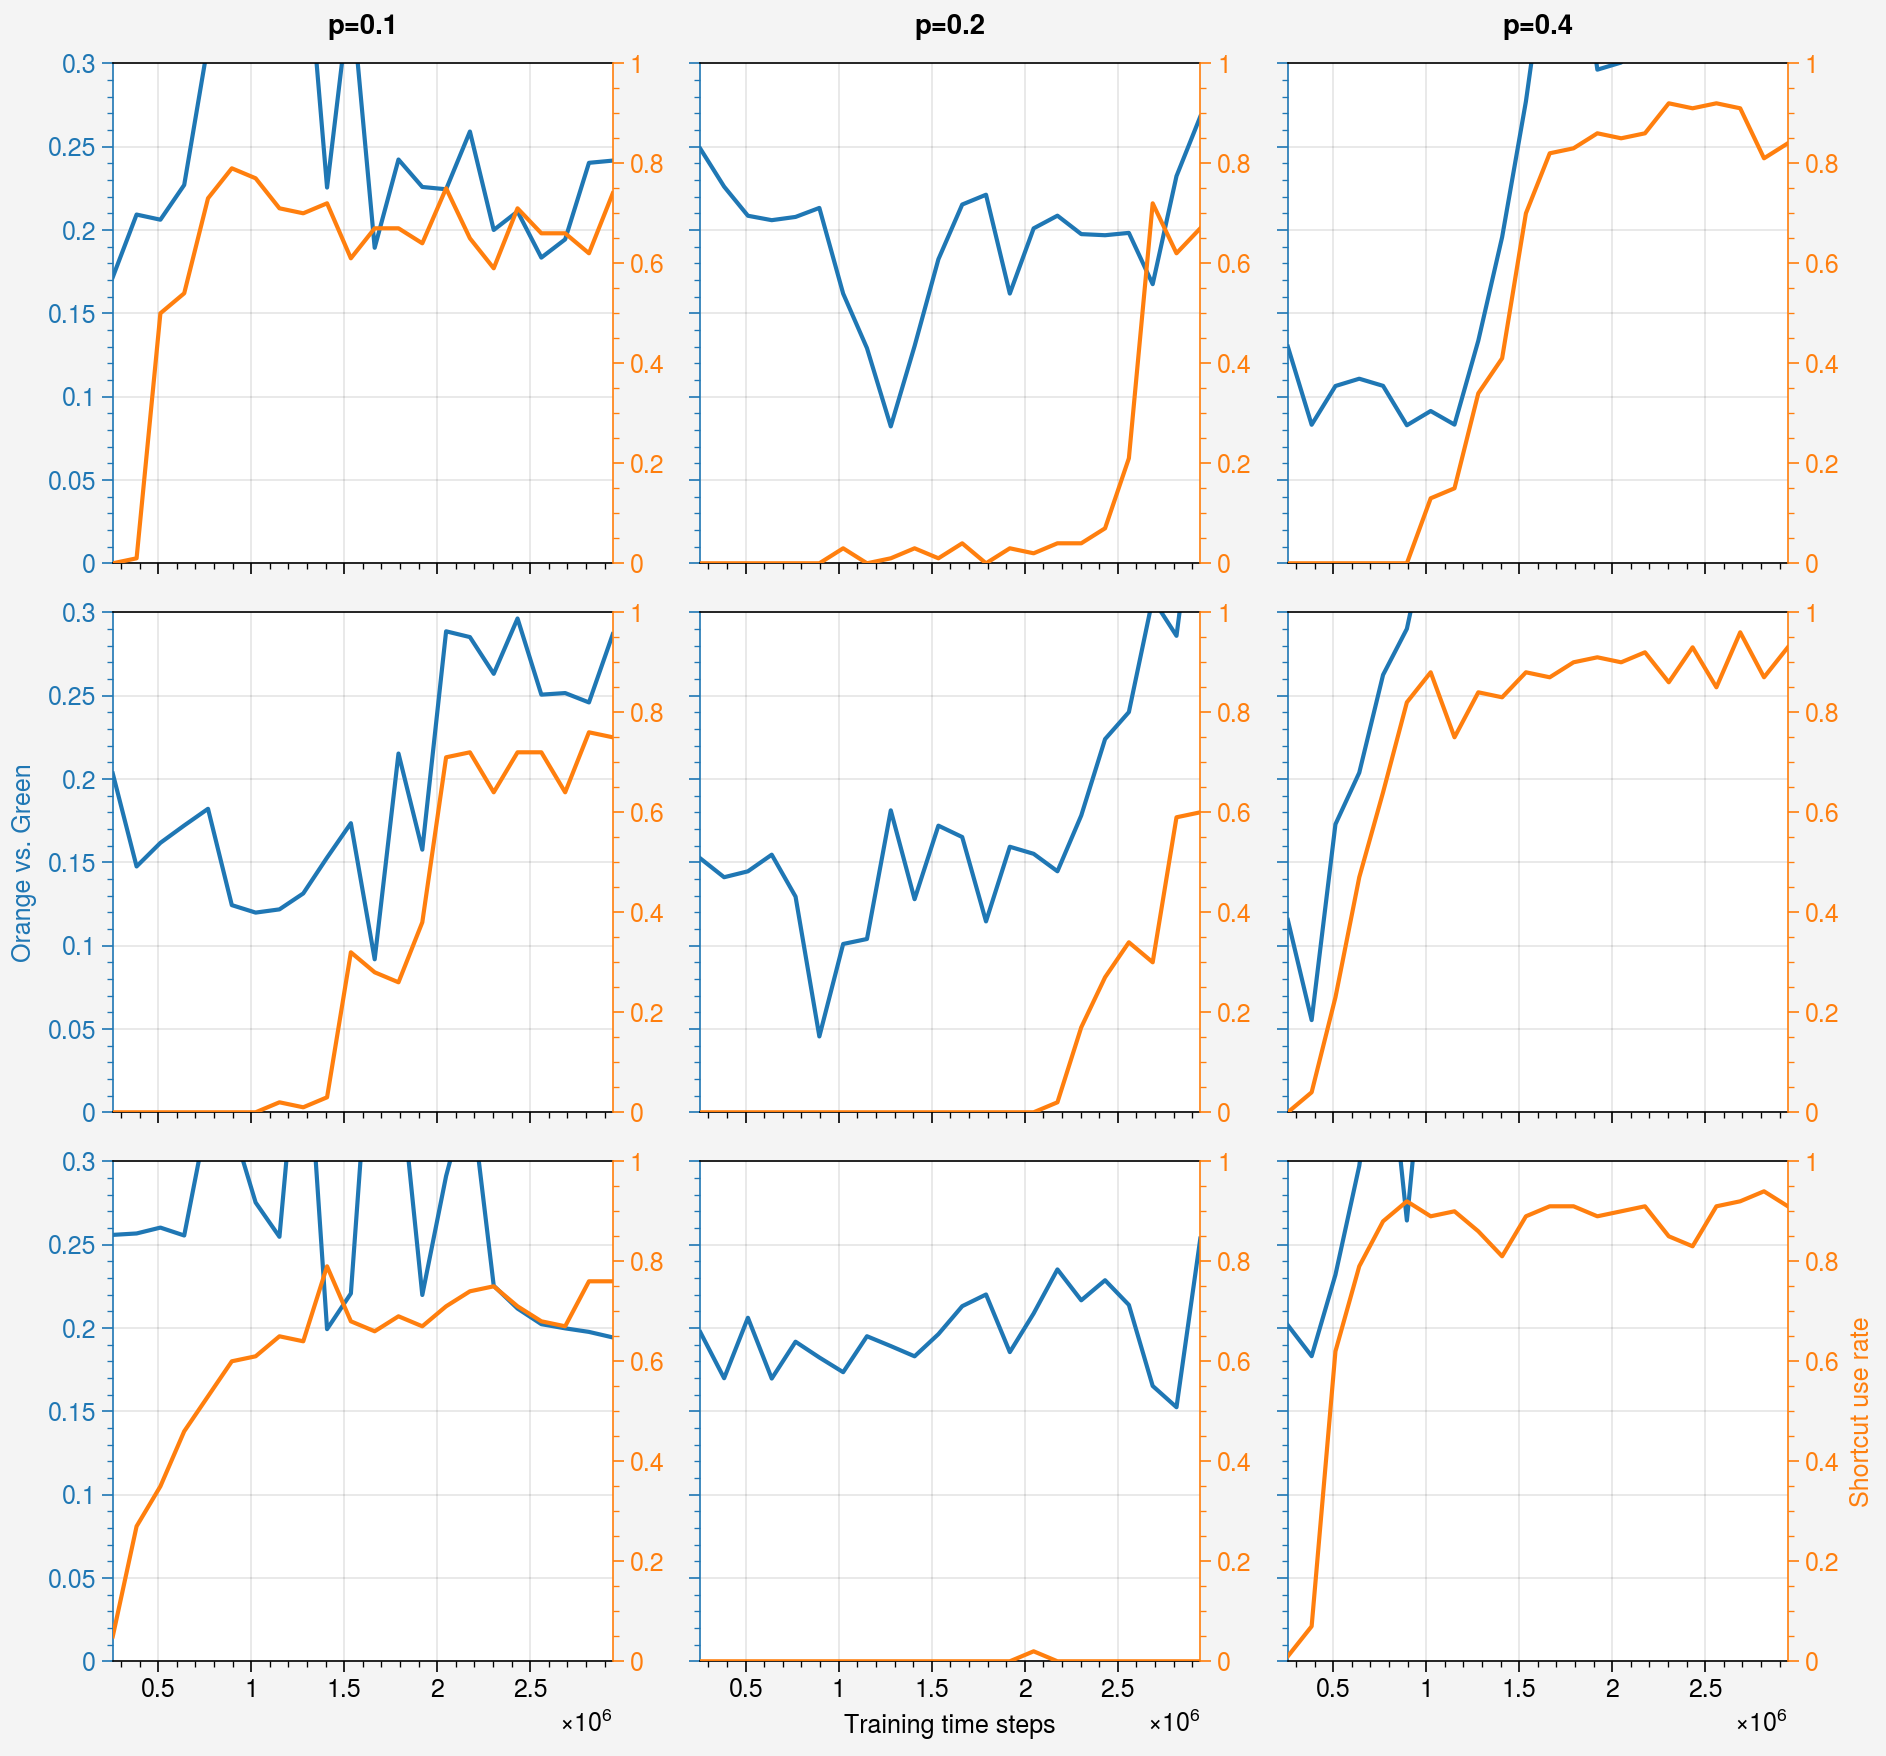

In [24]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
batch = 64

fig, ax = pplt.subplots(ncols=3, nrows=3)
dual = ax.dualy(lambda y: (y) / 0.3, color=hex_colors[1])

num_chks = len(chks)
for n, p in enumerate(probs):
    count = 0
    ys = []
    ys2 = []
    
    for t in range(3):
        key = f'{batch}_{p}_{t}'
        scores = []
        for chk in range(num_chks):
            scores.append(all_silscores[key][chk][1, 2])
            
        ax[t, n].plot(chks*64*100, scores, label='Mean silhouette score', 
                      color=rgb_colors[0])
        dual[t, n].plot(chks*64*100, all_shortcut_use_rates[key], 
                        label='Shortcut use rate', color=rgb_colors[1])
                
ax.format(toplabels=[f'p={p}' for p in probs], xlabel='Training time steps',
          ylim=[0, 0.3], ycolor=hex_colors[0], ylabel='Orange vs. Green')
dual[-1].format(ylabel='Shortcut use rate')


## Shortcut use rate vs. Mean silhouette score scatter

**4 Wall colors**

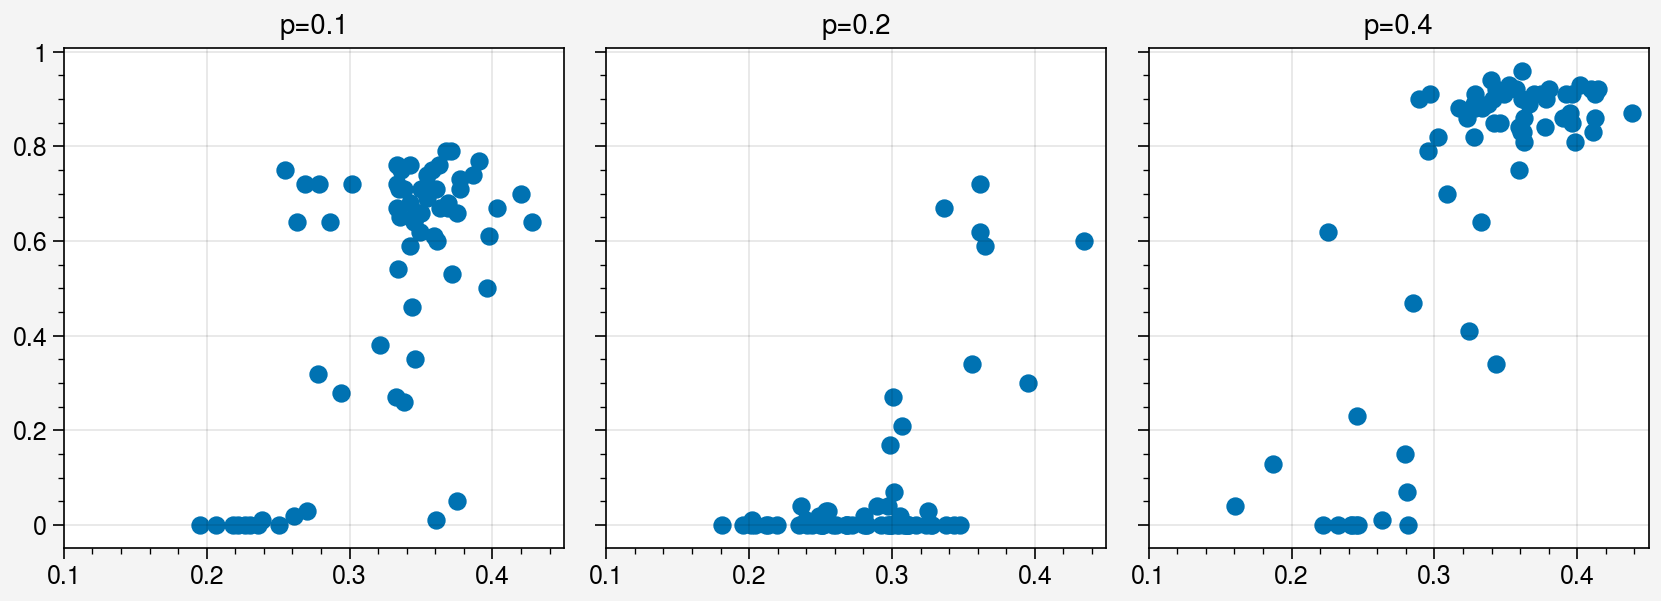

In [24]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
batch = 64


fig, ax = pplt.subplots(ncols=3)

num_chks = len(chks)
for n, p in enumerate(probs):
    xs = []
    ys = []
    for t in range(3):
        key = f'{batch}_{p}_{t}'
        scores = []
        for i, j in itertools.product(range(5), range(5)):
            s = []
            if j <= i:
                continue
            for chk in range(num_chks):
                s.append(all_silscores[key][chk][i, j])
            scores.append(s)
        scores = np.mean(scores, axis=0)
        xs.append(scores)
        ys.append(all_shortcut_use_rates[key])
    
    xs = np.concatenate(xs)
    ys = np.concatenate(ys)
    ax[n].scatter(xs, ys)
        
ax.format(title=[f'p={p}' for p in probs], xlim=[0.1, 0.45])

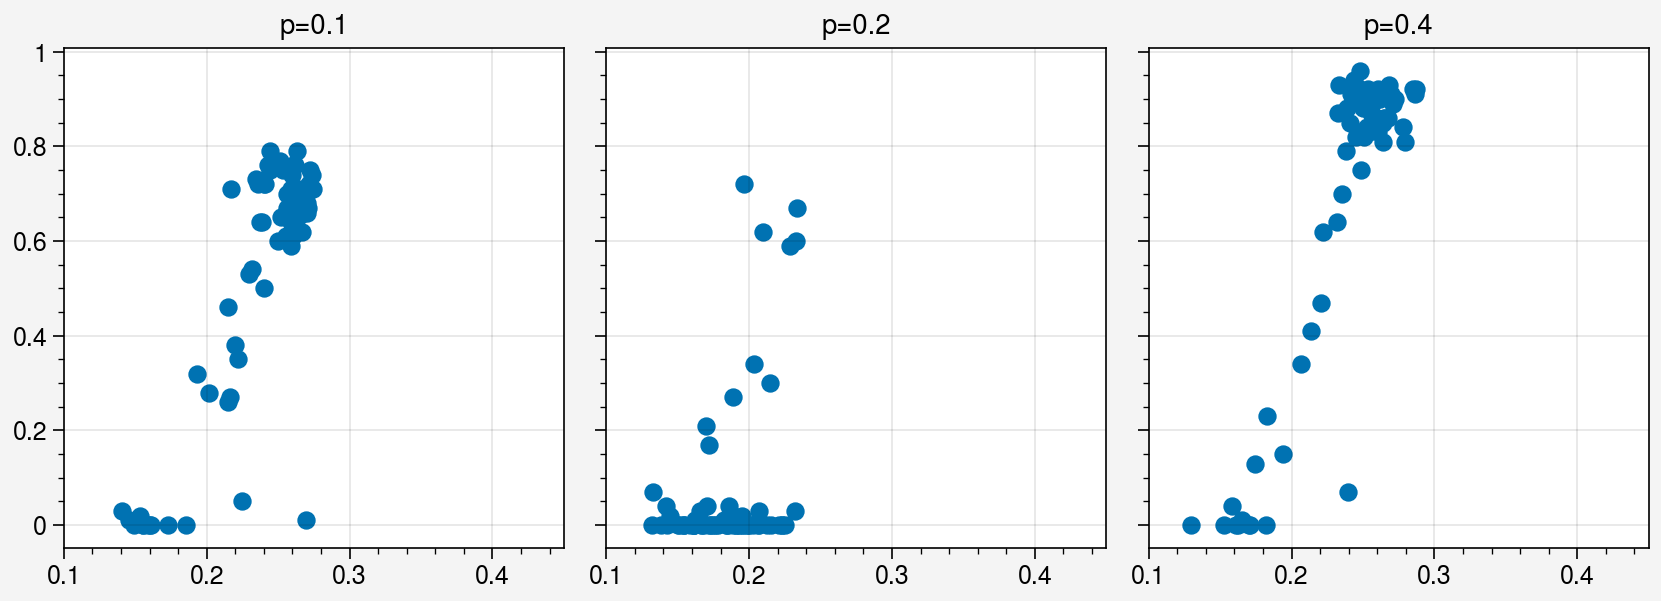

In [40]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores_noumap', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]
batch = 64


fig, ax = pplt.subplots(ncols=3)

num_chks = len(chks)
for n, p in enumerate(probs):
    xs = []
    ys = []
    for t in range(3):
        key = f'{batch}_{p}_{t}'
        scores = []
        for i, j in itertools.product(range(5), range(5)):
            s = []
            if j <= i:
                continue
            for chk in range(num_chks):
                s.append(all_silscores[key][chk][i, j])
            scores.append(s)
        scores = np.mean(scores, axis=0)
        xs.append(scores)
        ys.append(all_shortcut_use_rates[key])
    
    xs = np.concatenate(xs)
    ys = np.concatenate(ys)
    ax[n].scatter(xs, ys)
        
ax.format(title=[f'p={p}' for p in probs], xlim=[0.1, 0.45])

**White wall color**

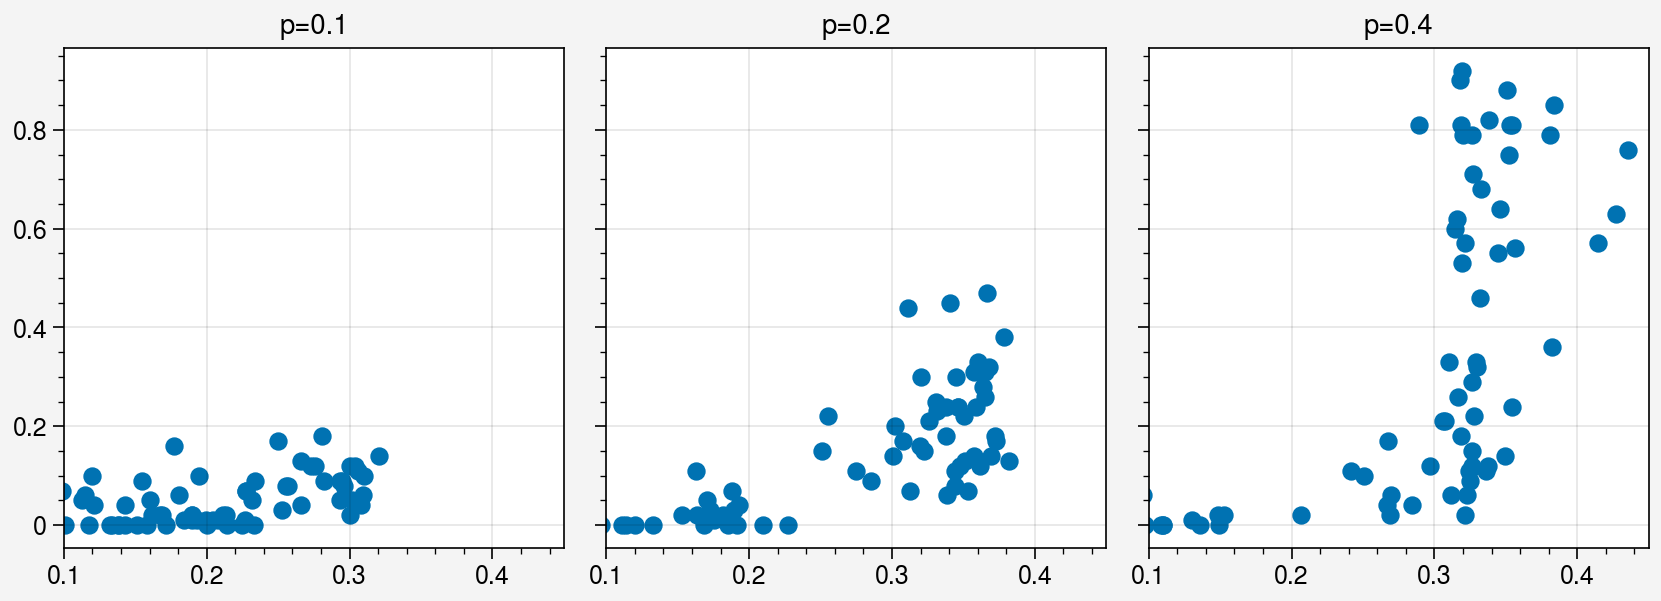

In [23]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]


fig, ax = pplt.subplots(ncols=3)

num_chks = len(chks)
for n, p in enumerate(probs):
    xs = []
    ys = []
    for t in range(3):
        key = f'{p}_{t}'
        scores = []
        for i, j in itertools.product(range(5), range(5)):
            s = []
            if j <= i:
                continue
            for chk in range(num_chks):
                s.append(all_silscores[key][chk][i, j])
            scores.append(s)
        scores = np.mean(scores, axis=0)
        xs.append(scores)
        ys.append(all_shortcut_use_rates[key])
    
    xs = np.concatenate(xs)
    ys = np.concatenate(ys)
    ax[n].scatter(xs, ys)
        
ax.format(title=[f'p={p}' for p in probs], xlim=[0.1, 0.45])

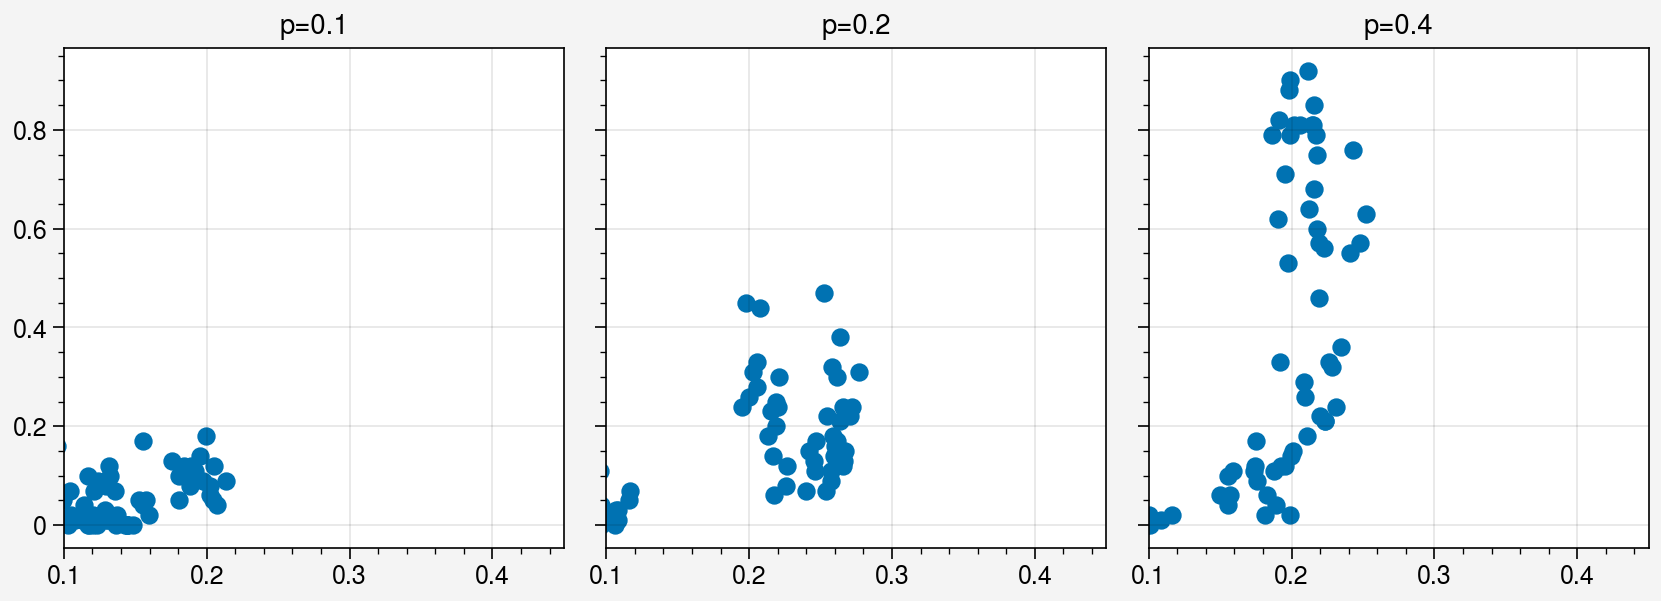

In [41]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores_noumap', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))
chks = 40 + np.arange(0, 440, 20)
probs = [0.1, 0.2, 0.4]


fig, ax = pplt.subplots(ncols=3)

num_chks = len(chks)
for n, p in enumerate(probs):
    xs = []
    ys = []
    for t in range(3):
        key = f'{p}_{t}'
        scores = []
        for i, j in itertools.product(range(5), range(5)):
            s = []
            if j <= i:
                continue
            for chk in range(num_chks):
                s.append(all_silscores[key][chk][i, j])
            scores.append(s)
        scores = np.mean(scores, axis=0)
        xs.append(scores)
        ys.append(all_shortcut_use_rates[key])
    
    xs = np.concatenate(xs)
    ys = np.concatenate(ys)
    ax[n].scatter(xs, ys)
        
ax.format(title=[f'p={p}' for p in probs], xlim=[0.1, 0.45])

### Shortcut use vs individual silscores

**4 wall colors**

In [13]:
surs

[]

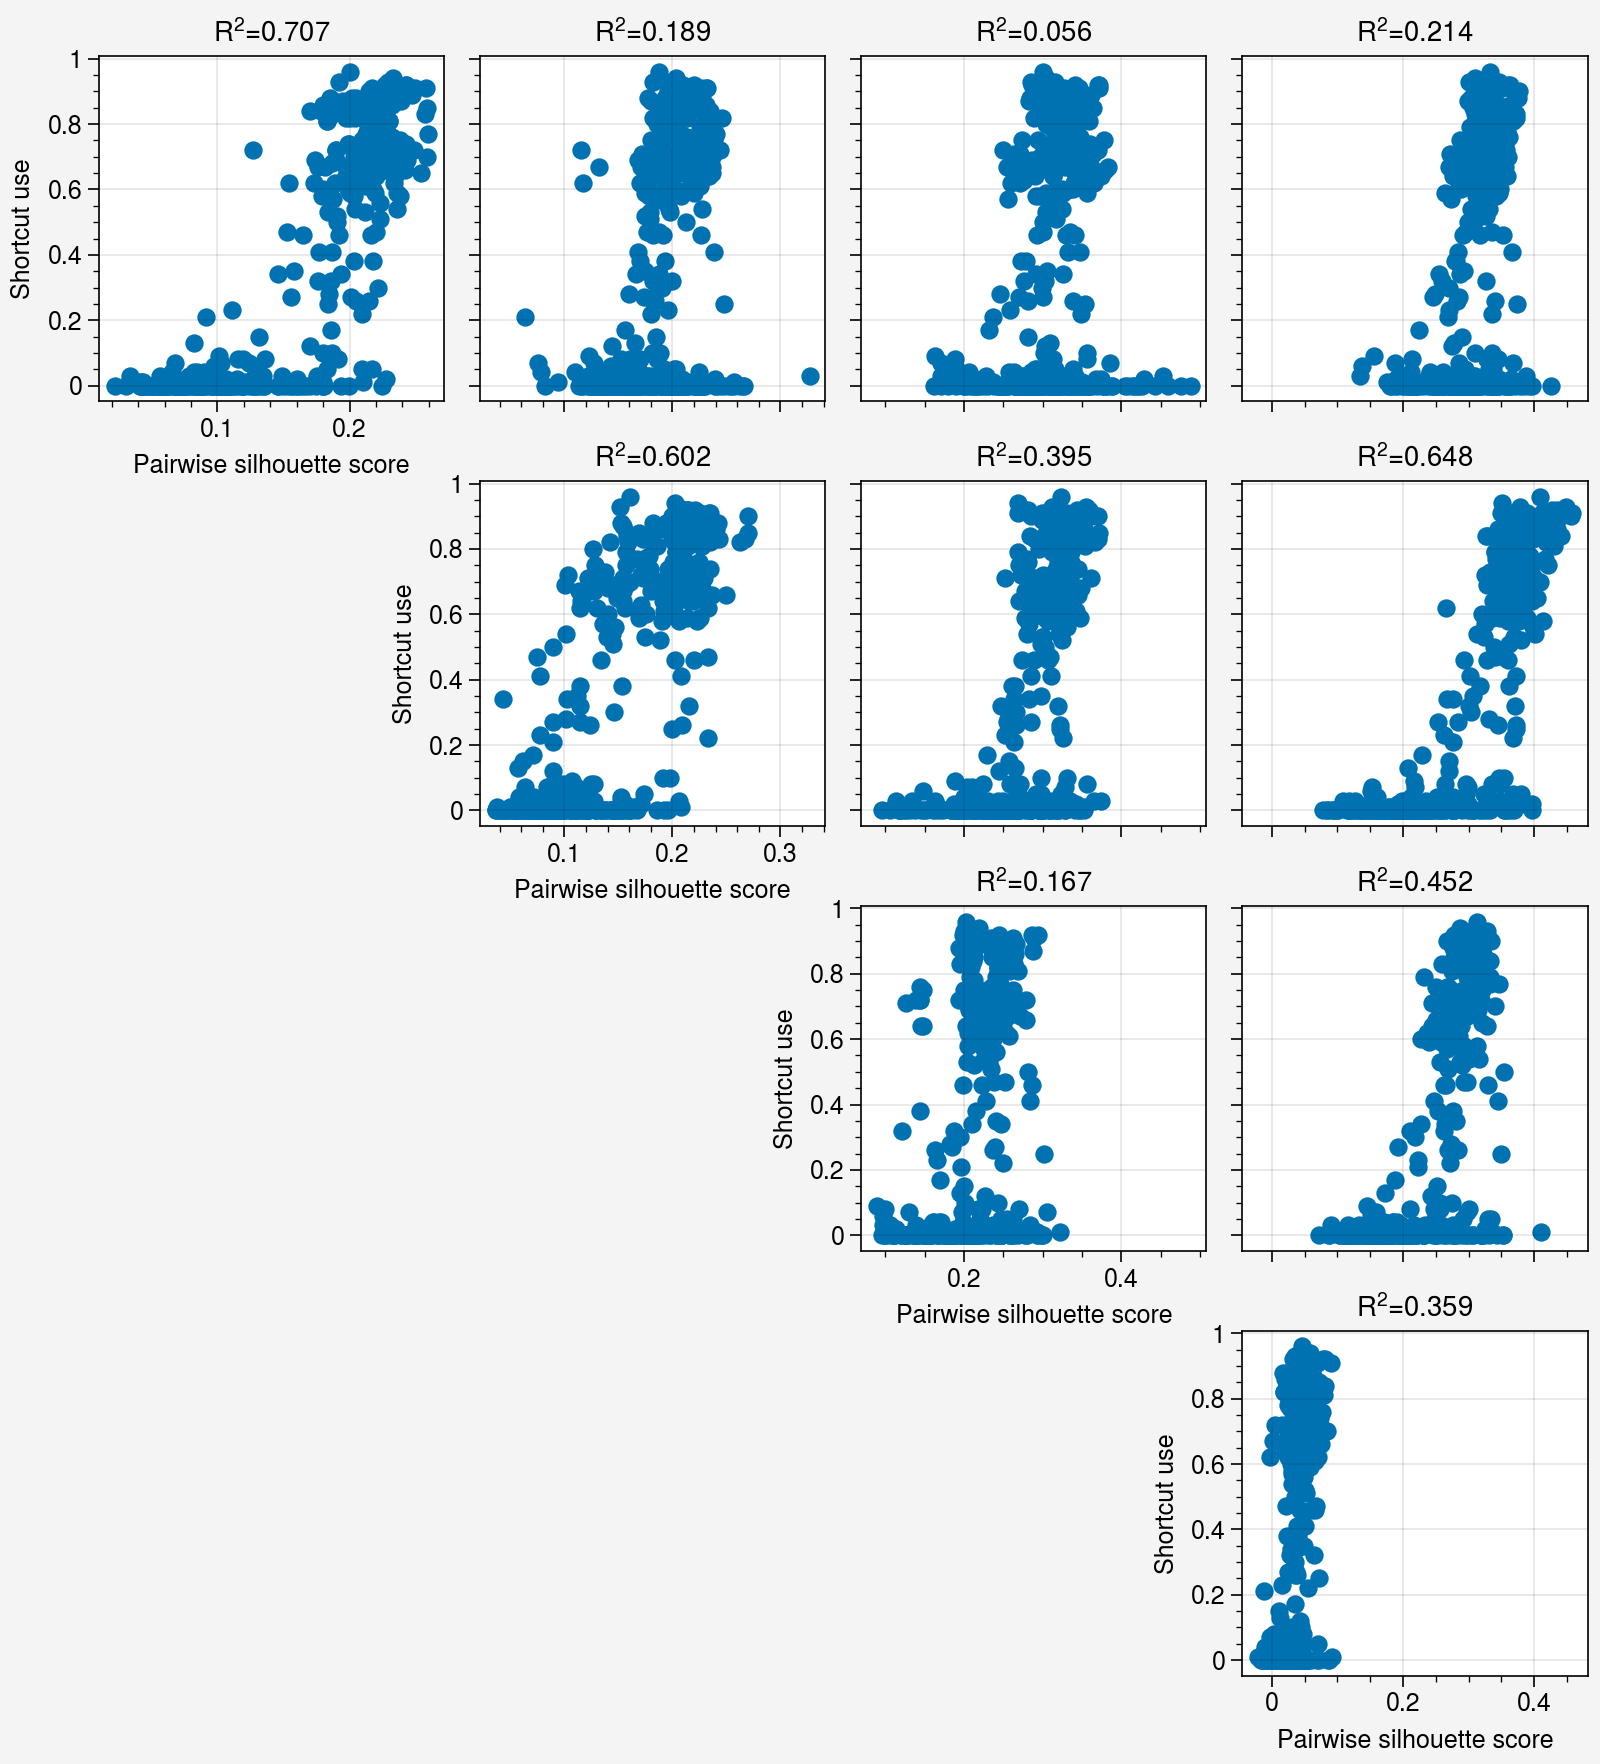

In [15]:
all_silscores = pickle.load(open('data/shortcut/wc4_copied/pairwise_silscores_noumap', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc4_userates', 'rb'))


array = [
    [1, 2, 3, 4],
    [0, 5, 6, 7],
    [0, 0, 8, 9],
    [0, 0, 0, 10]
]
fig, ax = pplt.subplots(array, figwidth=8)

count = 0
title = []
for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    scores = []
    surs = []
    for key in all_silscores['shared1'].keys():
        for n in range(len(all_silscores['shared1'][key])):
            score = all_silscores['shared1'][key][n][i, j]
            scores.append(score)
            surs.append(all_shortcut_use_rates[key][n])
    ax[count].scatter(scores, surs)
    
    x, y, r2 = linear_bestfit(scores, surs)
    title.append(r2)
    count += 1
    
ax.format(title=[f'R$^2$={t:.3f}' for t in title], xlabel='Pairwise silhouette score',
         ylabel='Shortcut use')
    

**White wall color**

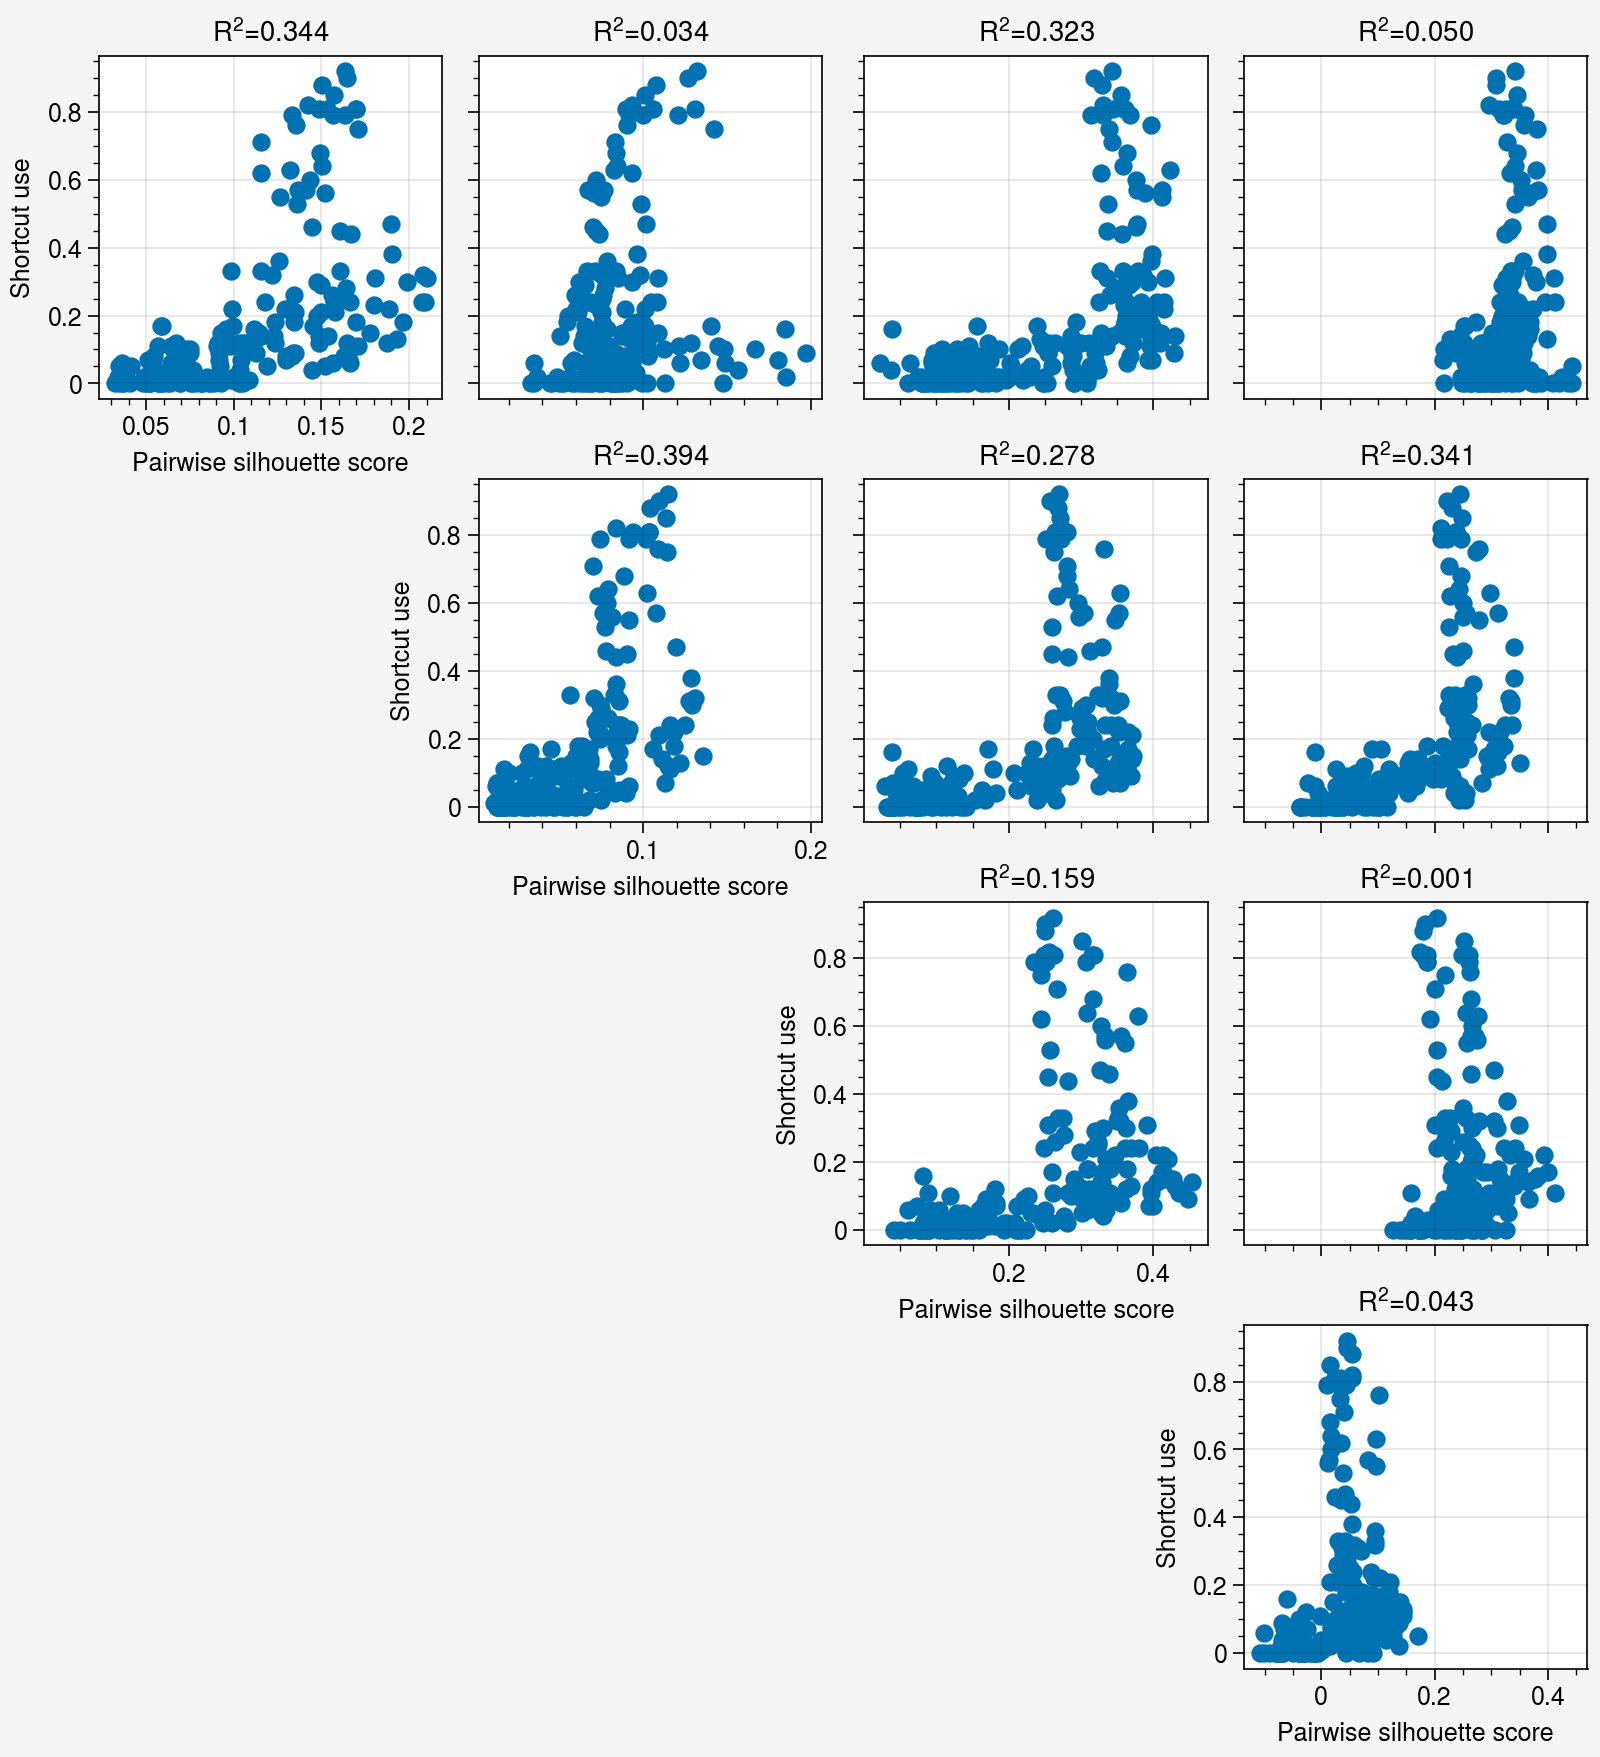

In [16]:
all_silscores = pickle.load(open('data/shortcut/wc1.5_copied/pairwise_silscores_noumap', 'rb'))
all_shortcut_use_rates = pickle.load(open('data/shortcut/shortcut_wc1.5_userates', 'rb'))


array = [
    [1, 2, 3, 4],
    [0, 5, 6, 7],
    [0, 0, 8, 9],
    [0, 0, 0, 10]
]
fig, ax = pplt.subplots(array, figwidth=8)

count = 0
title = []
for i, j in itertools.product(range(5), range(5)):
    if j <= i:
        continue
    scores = []
    surs = []
    for key in all_silscores['shared1'].keys():
        for n in range(len(all_silscores['shared1'][key])):
            score = all_silscores['shared1'][key][n][i, j]
            scores.append(score)
            surs.append(all_shortcut_use_rates[key][n])
    ax[count].scatter(scores, surs)
    x, y, r2 = linear_bestfit(scores, surs)
    title.append(r2)
    count += 1
    
ax.format(title=[f'R$^2$={t:.3f}' for t in title], xlabel='Pairwise silhouette score',
         ylabel='Shortcut use')
    